In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

plt.rcParams['font.family'] = "Gulim" 
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
data = pd.read_csv(r"C:\Users\dongseop\Desktop\training_data.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [5]:
df.describe()

,Patient ID,Height,Weight,Additional ID
count,942.000000,826.000000,837.000000,140.000000
mean,66624.319533,110.800242,23.632756,58208.735714
std,16966.858912,30.000607,15.453337,10216.094378
min,2530.000000,35.000000,2.300000,23625.000000
25%,50263.250000,89.000000,12.500000,50092.000000
50%,68452.500000,115.000000,20.400000,50661.500000
75%,84938.500000,133.000000,31.200000,68466.250000
max,85349.000000,180.000000,110.800000,85234.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                942 non-null    int64  
 1   Recording locations:      942 non-null    object 
 2   Age                       868 non-null    object 
 3   Sex                       942 non-null    object 
 4   Height                    826 non-null    float64
 5   Weight                    837 non-null    float64
 6   Pregnancy status          942 non-null    bool   
 7   Murmur                    942 non-null    object 
 8   Murmur locations          179 non-null    object 
 9   Most audible location     179 non-null    object 
 10  Systolic murmur timing    178 non-null    object 
 11  Systolic murmur shape     178 non-null    object 
 12  Systolic murmur grading   178 non-null    object 
 13  Systolic murmur pitch     178 non-null    object 
 14  Systolic m

### 수축기 값 확인

In [7]:
df['Systolic murmur timing'].value_counts(dropna=False)

Systolic murmur timing
NaN               764
Holosystolic      101
Early-systolic     59
Mid-systolic       17
Late-systolic       1
Name: count, dtype: int64

In [8]:
df['Systolic murmur shape'].value_counts(dropna=False)

Systolic murmur shape
NaN            764
Plateau        111
Decrescendo     34
Diamond         31
Crescendo        2
Name: count, dtype: int64

In [9]:
df['Systolic murmur grading'].value_counts(dropna=False)

Systolic murmur grading
NaN       764
I/VI      104
III/VI     46
II/VI      28
Name: count, dtype: int64

In [10]:
df['Systolic murmur pitch'].value_counts(dropna=False)

Systolic murmur pitch
NaN       764
Low        87
Medium     49
High       42
Name: count, dtype: int64

In [11]:
df['Systolic murmur quality'].value_counts(dropna=False)

Systolic murmur quality
NaN        764
Harsh       96
Blowing     78
Musical      4
Name: count, dtype: int64

### 이완기 값 확인

In [12]:
df['Diastolic murmur timing'].value_counts(dropna=False)

Diastolic murmur timing
NaN                937
Early-diastolic      5
Name: count, dtype: int64

In [13]:
df['Diastolic murmur shape'].value_counts(dropna=False)

Diastolic murmur shape
NaN            937
Decrescendo      5
Name: count, dtype: int64

In [14]:
df['Diastolic murmur grading'].value_counts(dropna=False)

Diastolic murmur grading
NaN       937
I/IV        3
II/IV       1
III/IV      1
Name: count, dtype: int64

In [15]:
df['Diastolic murmur pitch'].value_counts(dropna=False)

Diastolic murmur pitch
NaN       937
Low         2
Medium      2
High        1
Name: count, dtype: int64

In [16]:
df['Diastolic murmur quality'].value_counts(dropna=False)

Diastolic murmur quality
NaN        937
Blowing      4
Harsh        1
Name: count, dtype: int64

## 대략적인 분포 확인(히스토그램 및 막대그래프)

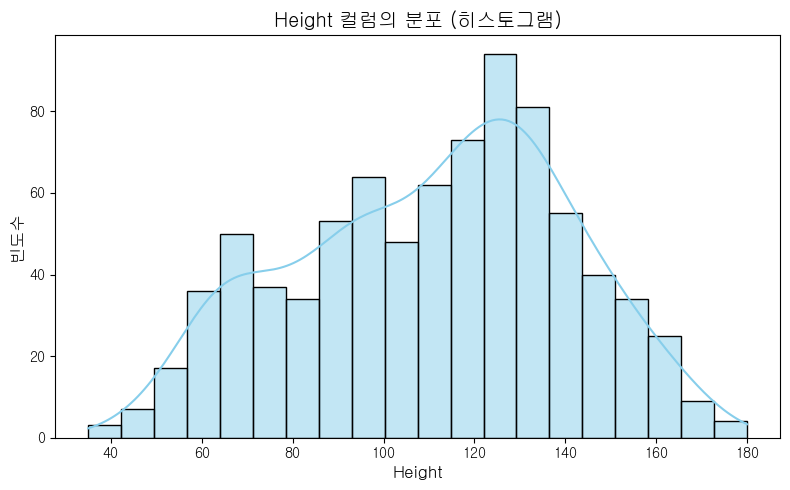

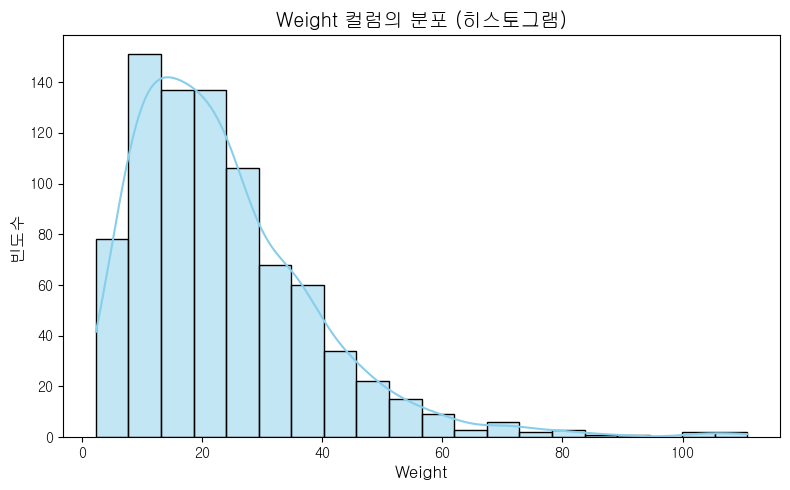

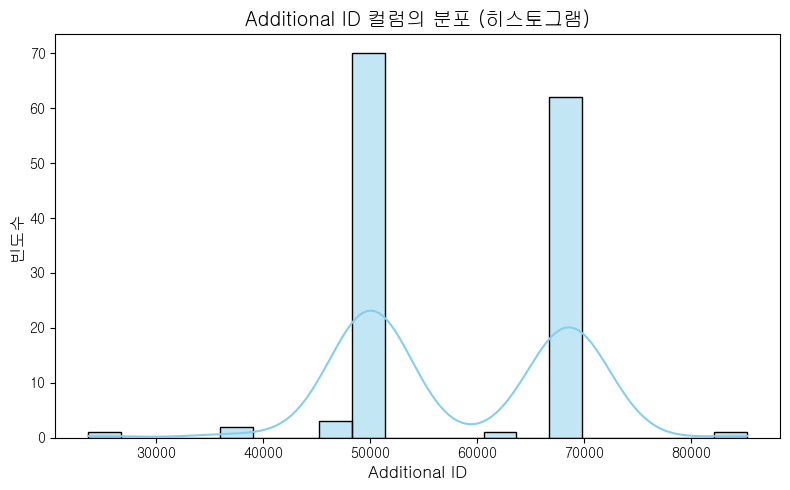

In [18]:
exclude_col = 'Patient ID'
numerical_cols = []

for col in df.columns:
    if col == exclude_col:
        continue
    
    column_type = df.dtypes[col]
    
    
    if column_type in [np.float64, np.int64]:
        numerical_cols.append(col)

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    data_to_plot = df[col].dropna()

    if data_to_plot.empty:
        plt.close()
        continue

    sns.histplot(data_to_plot, kde=True, bins=20, color='skyblue')
    plt.title(f'{col} 컬럼의 분포 (히스토그램)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('빈도수', fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


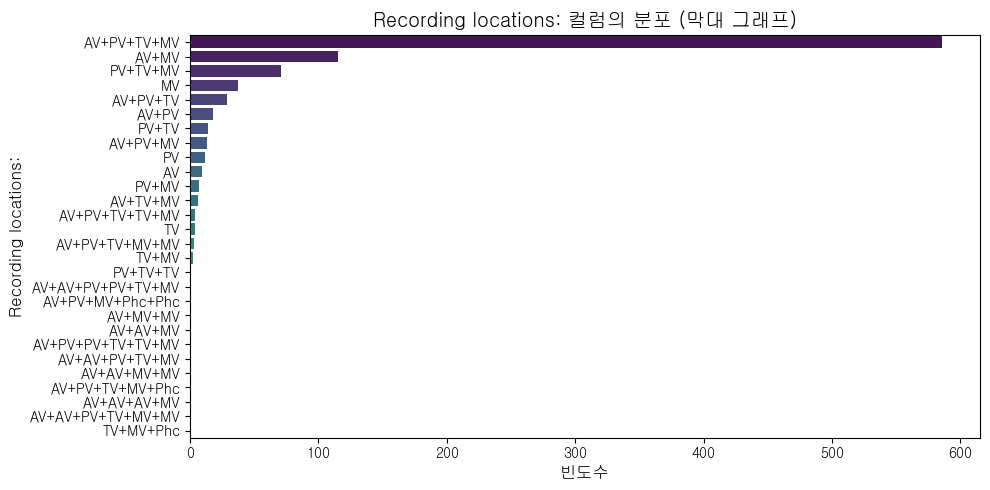

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


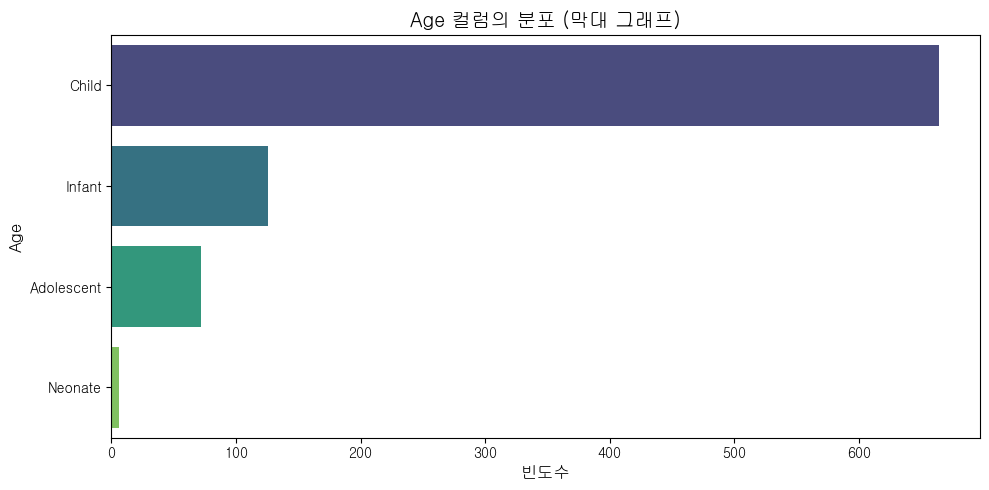

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


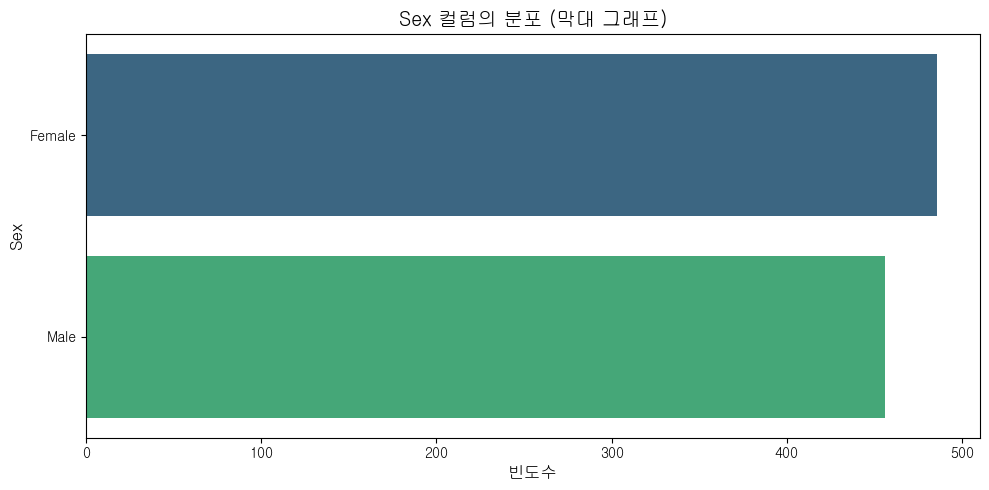

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


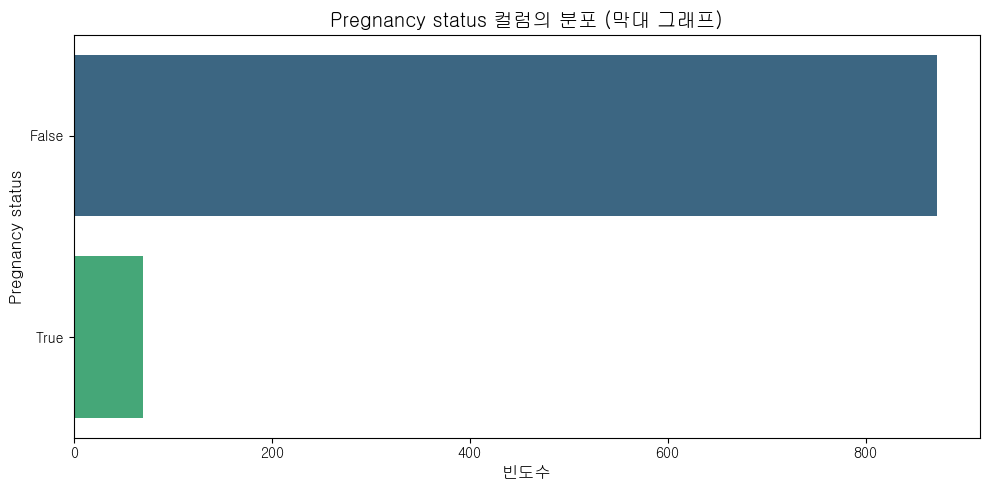

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


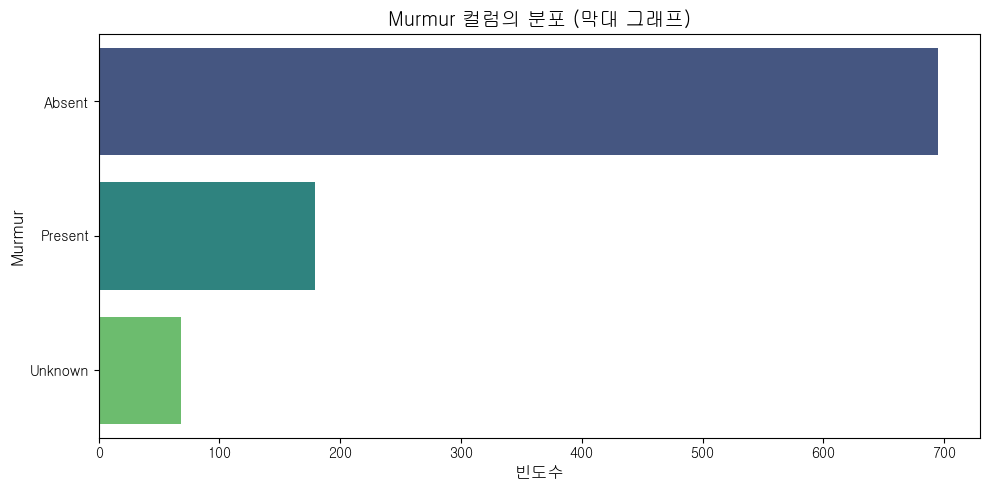

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


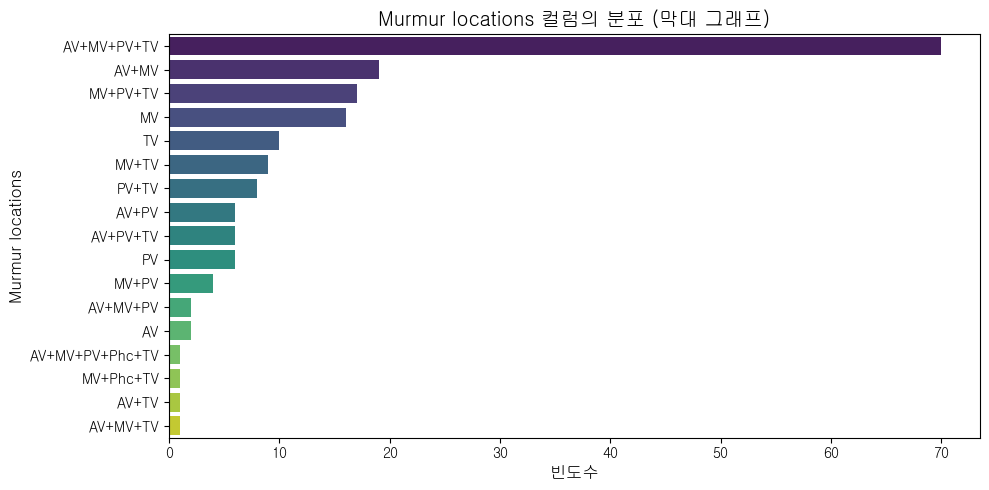

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


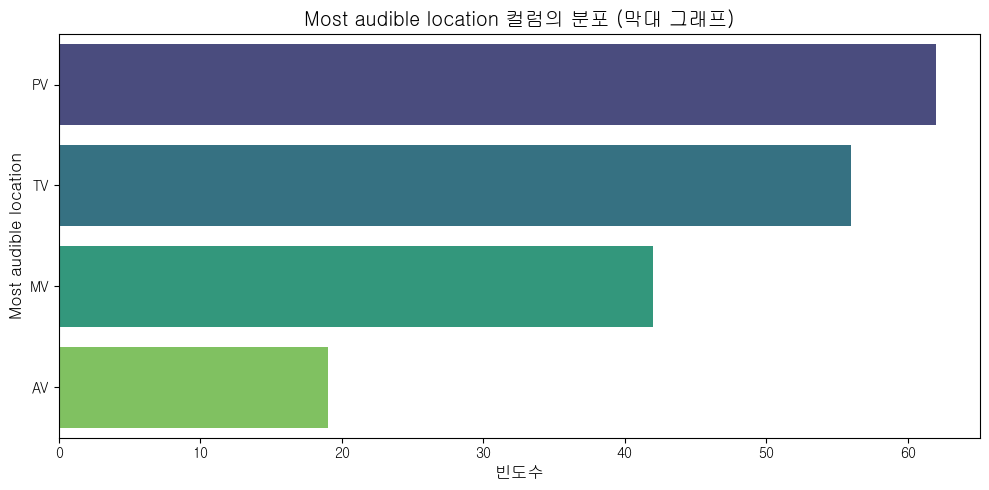

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


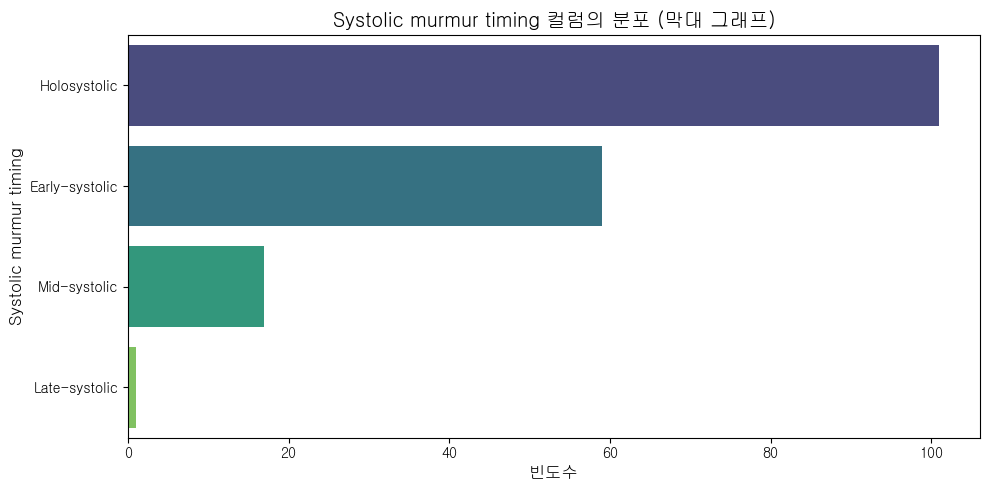

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


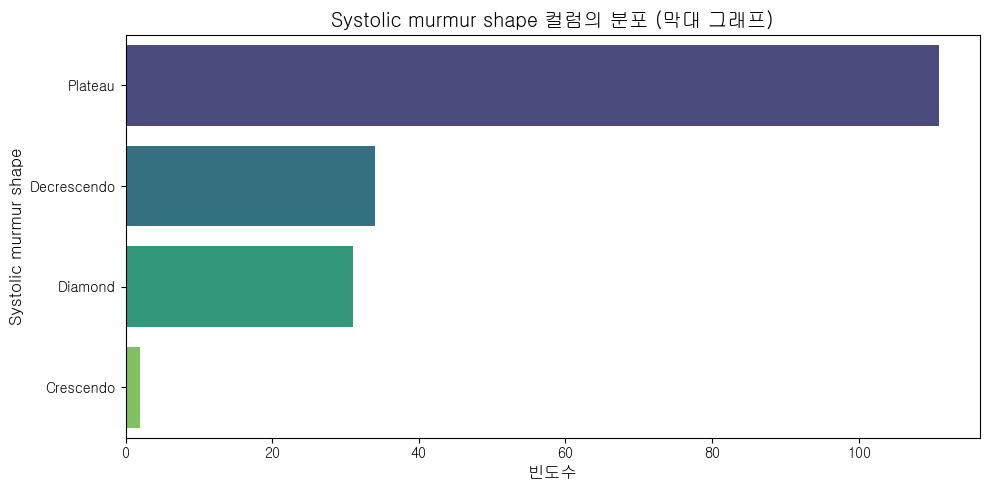

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


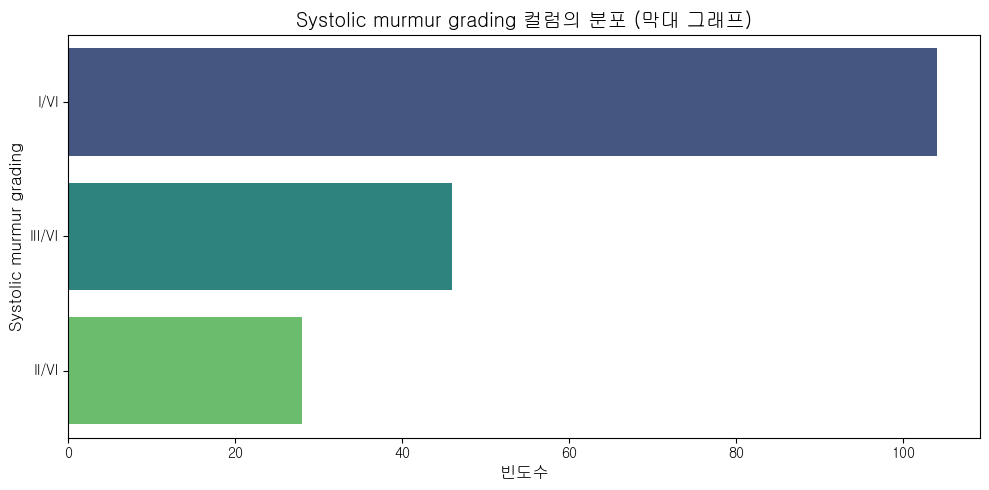

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


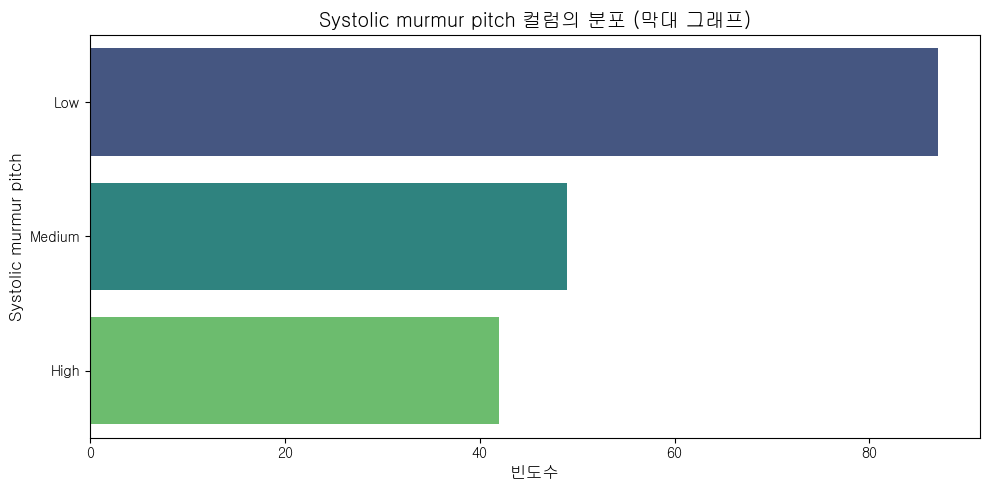

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


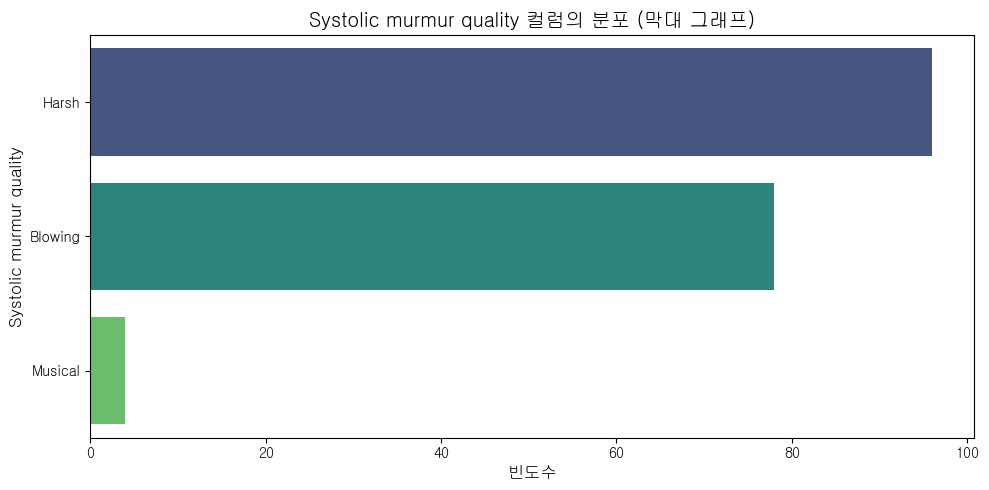

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


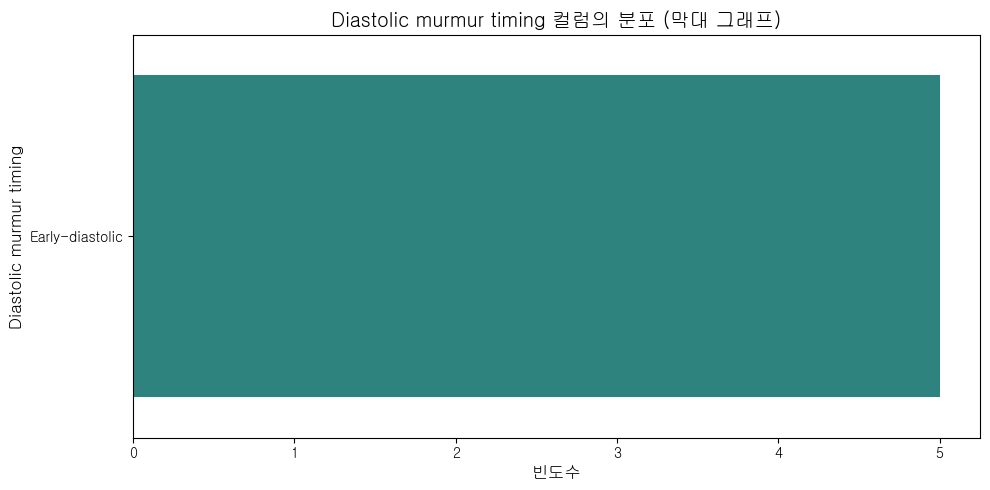

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


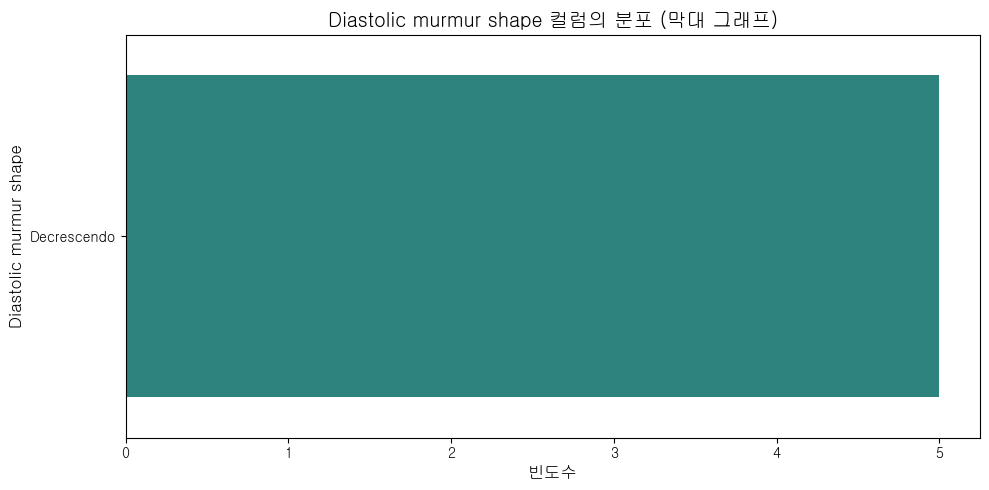

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


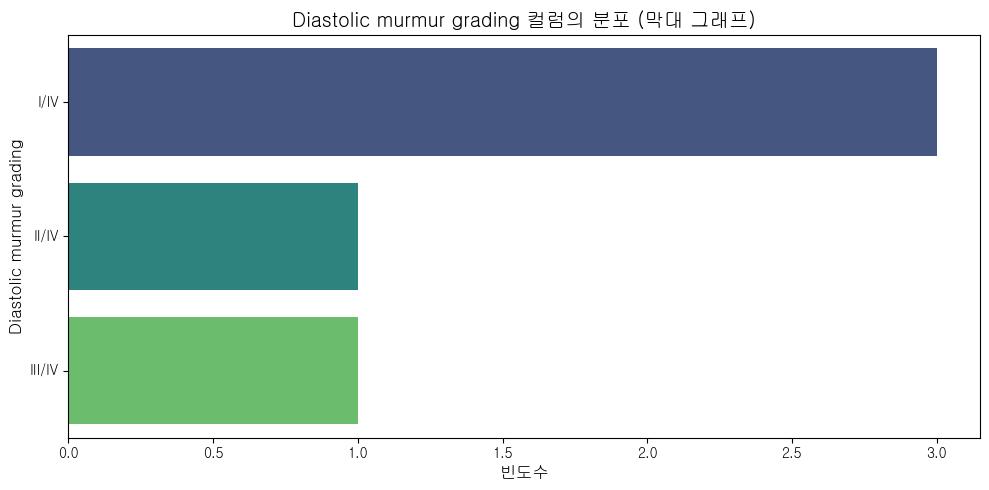

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


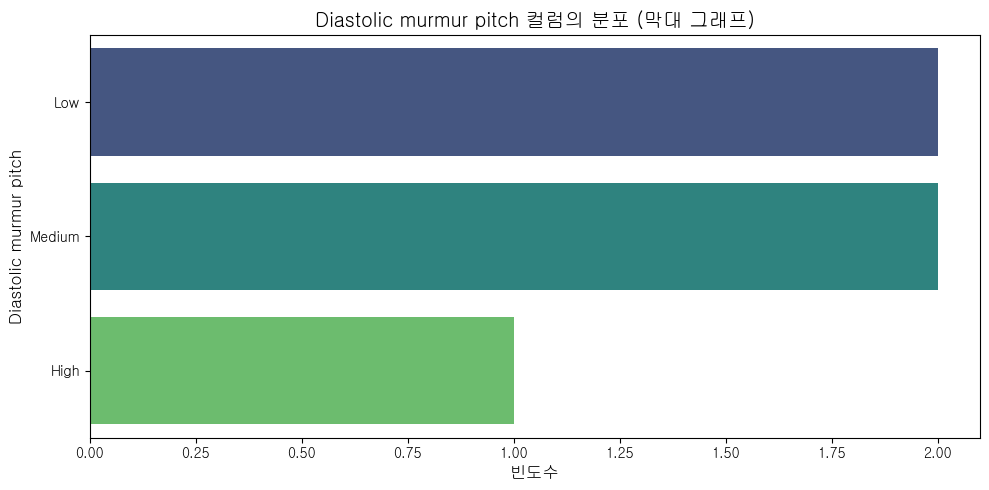

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


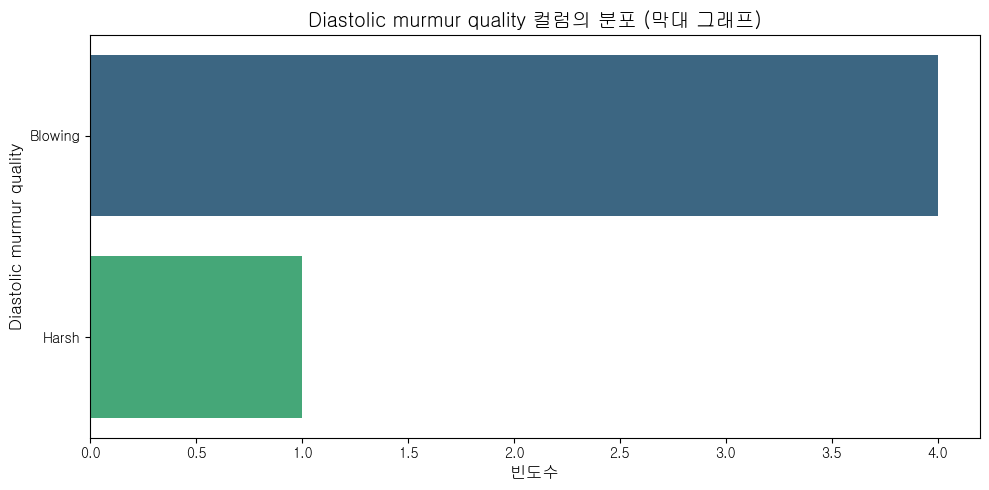

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


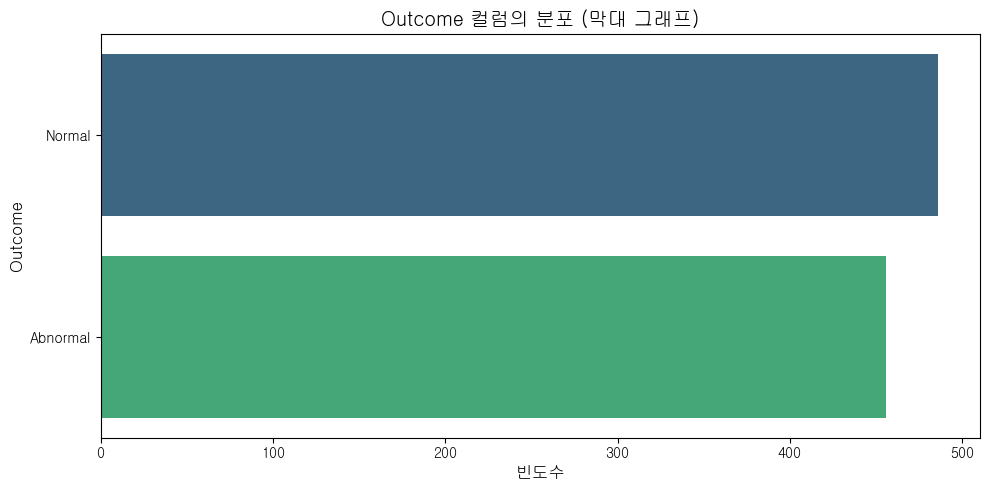

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\3703234430.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=order, palette='viridis')


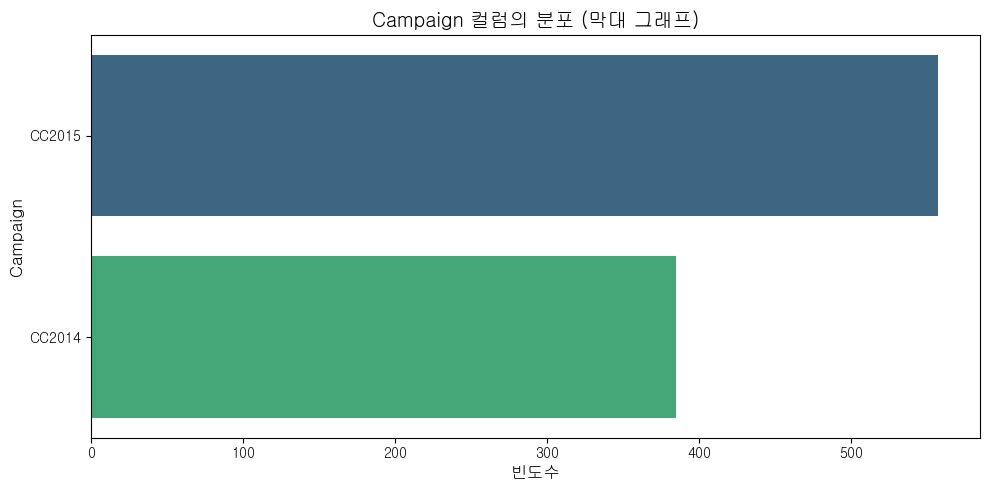

In [ ]:
exclude_col = 'Patient ID'
categorical_cols = []

for col in df.columns:
    if col == exclude_col:
        continue
    
    column_type = df.dtypes[col]
    
    if column_type == object or column_type == bool:
        categorical_cols.append(col)

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    
    # 고유값이 50개 이상인 경우 시각화에서 제외함 -> 막대그래프로 표현이 불가능 할듯
    if df[col].nunique() > 50:
        plt.close()
        continue

    # 빈도순으로 정렬하여 시각화
    order = df[col].value_counts().index
    
    sns.countplot(y=col, data=df, order=order, palette='viridis')
    plt.title(f'{col} 컬럼의 분포 (막대 그래프)', fontsize=14)
    plt.xlabel('빈도수', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

## 대략적인 이상치 확인

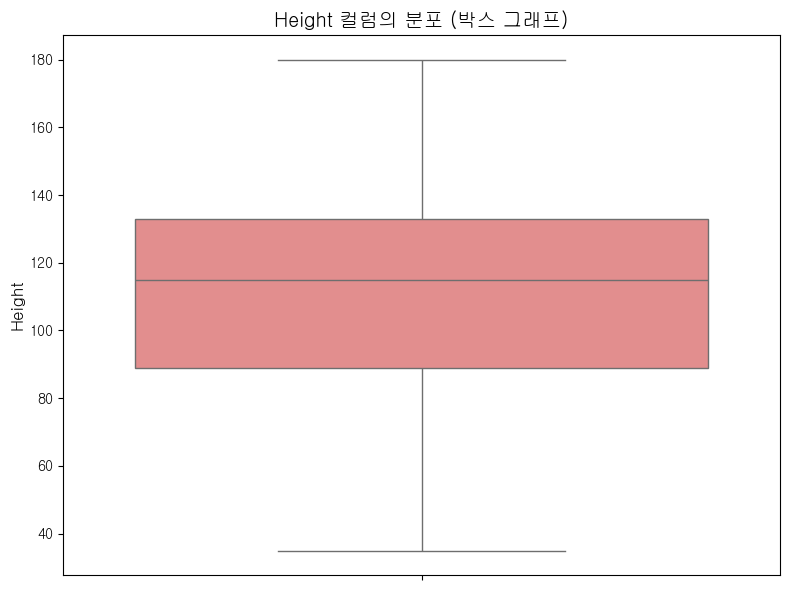

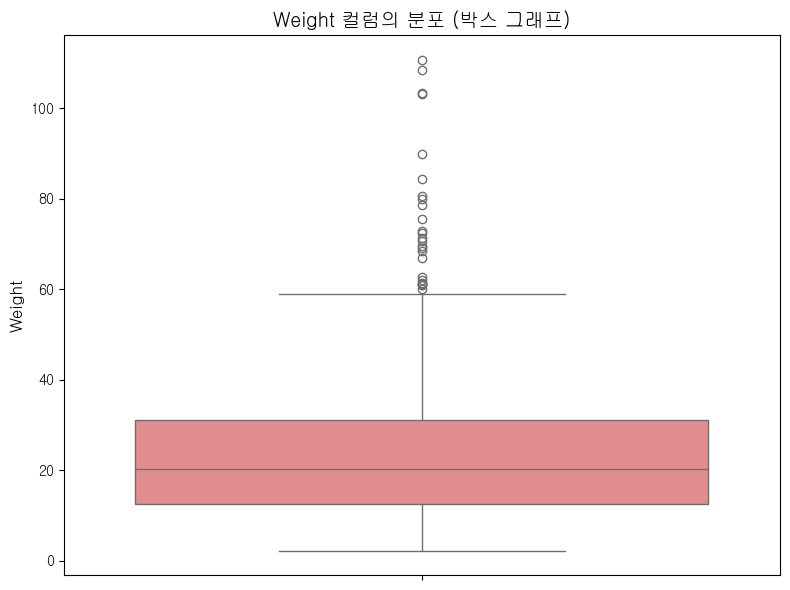

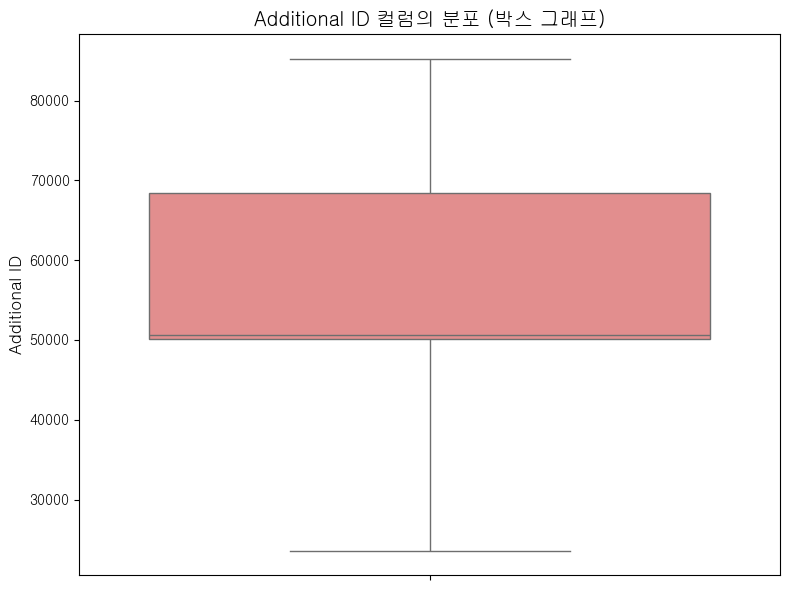

--- [시각화 종료] ---


In [ ]:
exclude_col = 'Patient ID'
numerical_cols = []

for col in df.columns:
    if col == exclude_col:
        continue
    
    column_type = df.dtypes[col]
    
    if column_type in [np.float64, np.int64]:
        numerical_cols.append(col)

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    data_to_plot = df[col].dropna()

    if data_to_plot.empty:
        plt.close()
        continue

    # 박스 그래프 생성
    sns.boxplot(y=data_to_plot, color='lightcoral')
    
    plt.title(f'{col} 컬럼의 분포 (박스 그래프)', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show() # 바로 출력

print("--- [시각화 종료] ---")

## EDA

### 1차

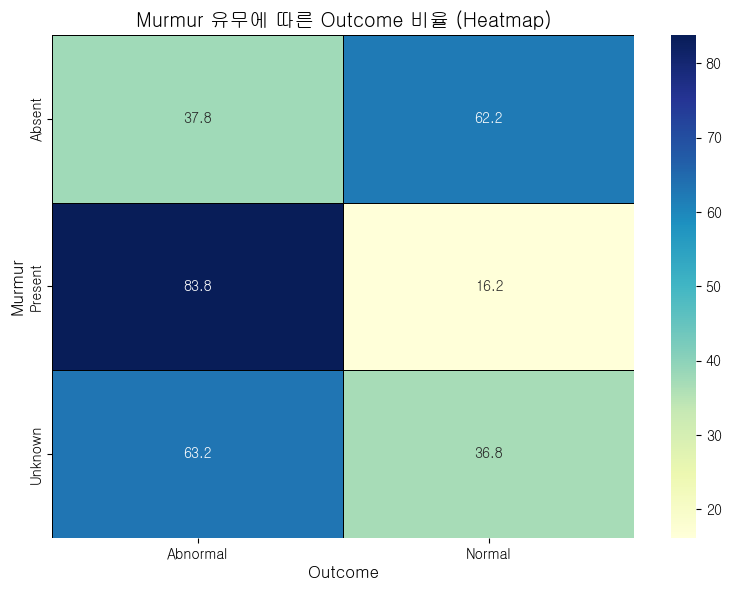

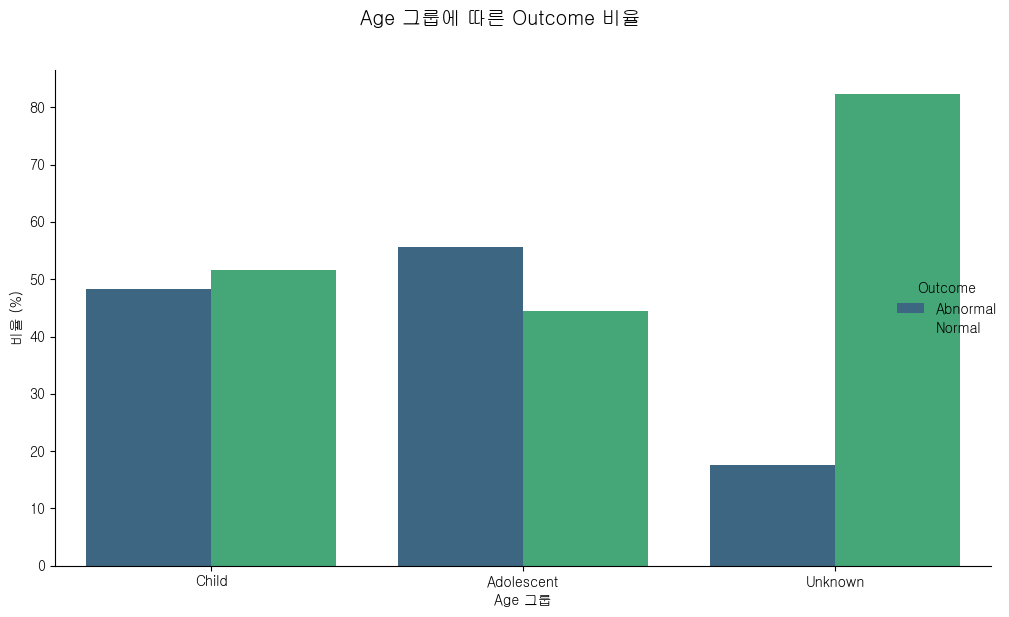

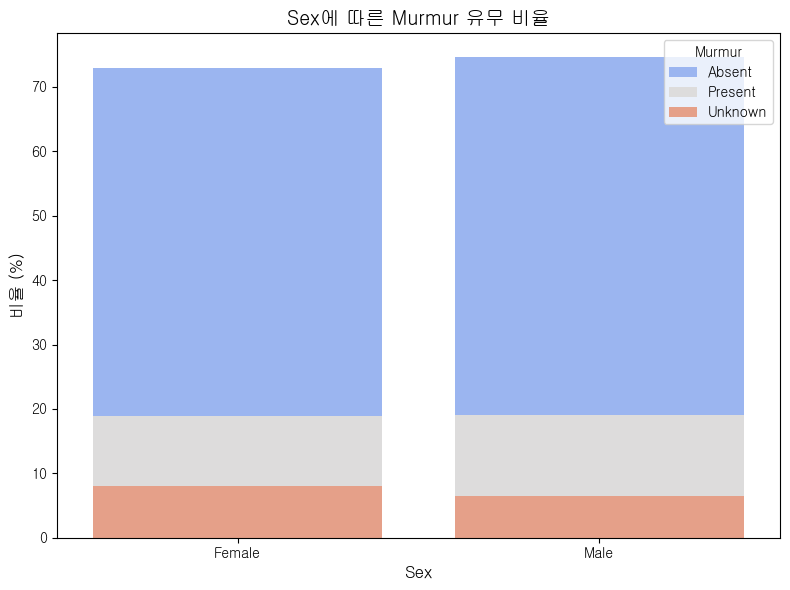

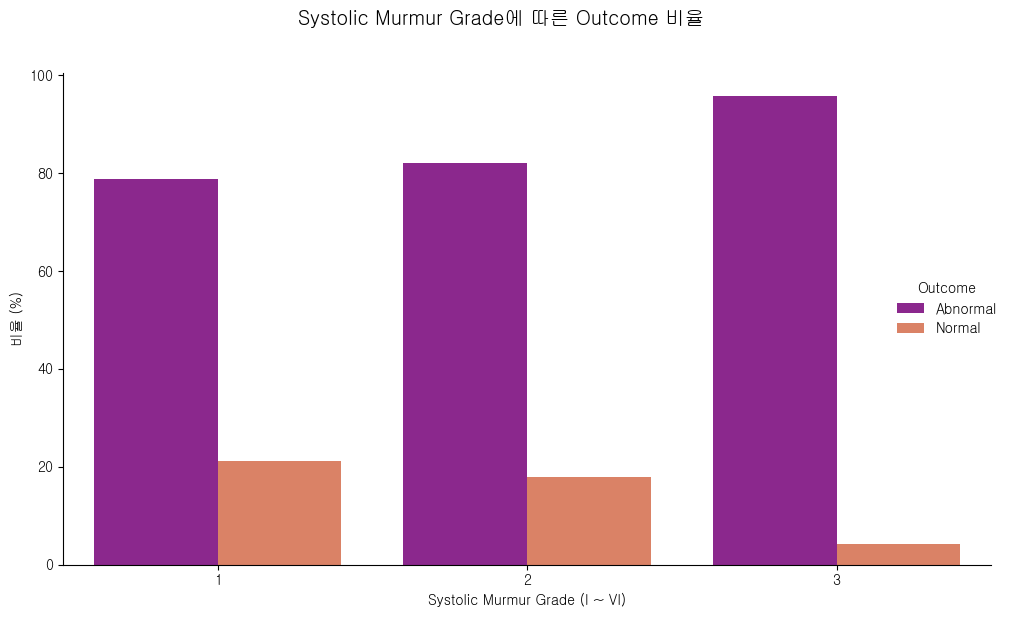

In [ ]:
# 조합 1: Murmur vs Outcome 
crosstab_murmur_outcome = pd.crosstab(df['Murmur'], df['Outcome'], normalize='index') * 100
crosstab_murmur_outcome = crosstab_murmur_outcome.round(1)

# 조합 2: Age vs Outcome 
df['Age'] = df['Age'].fillna('Unknown')
age_order = ['Child', 'Adolescent', 'Unknown'] 
df_age_filtered = df[df['Age'].isin(age_order)].copy()
df_age_filtered['Age'] = pd.Categorical(df_age_filtered['Age'], categories=age_order, ordered=True)
crosstab_age_outcome = pd.crosstab(df_age_filtered['Age'], df_age_filtered['Outcome'], normalize='index') * 100
crosstab_age_outcome = crosstab_age_outcome.round(1)
crosstab_age_outcome_melted = crosstab_age_outcome.reset_index().melt(id_vars='Age', var_name='Outcome', value_name='Percentage')

# 조합 3: Sex vs Murmur 
crosstab_sex_murmur = pd.crosstab(df['Sex'], df['Murmur'], normalize='index') * 100
crosstab_sex_murmur = crosstab_sex_murmur.round(1)
crosstab_sex_murmur_melted = crosstab_sex_murmur.reset_index().melt(id_vars='Sex', var_name='Murmur', value_name='Percentage')

# 조합 5: Systolic Murmur Grade vs Outcome 
df_present = df[df['Murmur'] == 'Present'].copy()
roman_to_int = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}

def extract_grade_roman(grade_str):
    if pd.isna(grade_str): return np.nan
    try:
        roman_numeral = grade_str.split('/')[0]
        return roman_to_int.get(roman_numeral, np.nan)
    except:
        return np.nan

df_present['Systolic Murmur Grade'] = df_present['Systolic murmur grading'].apply(extract_grade_roman)
df_present_filtered = df_present[~df_present['Systolic Murmur Grade'].isna()].copy()
df_present_filtered['Systolic Murmur Grade'] = df_present_filtered['Systolic Murmur Grade'].astype(int)
crosstab_grade_outcome = pd.crosstab(df_present_filtered['Systolic Murmur Grade'], df_present_filtered['Outcome'], normalize='index') * 100
crosstab_grade_outcome = crosstab_grade_outcome.round(1).reset_index()
crosstab_grade_outcome_melted = crosstab_grade_outcome.melt(id_vars='Systolic Murmur Grade', var_name='Outcome', value_name='Percentage')
grade_order = sorted(df_present_filtered['Systolic Murmur Grade'].unique())
hue_order = ['Abnormal', 'Normal']


# 조합 1: Murmur vs Outcome 
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_murmur_outcome, annot=True, fmt='.1f', cmap="YlGnBu", cbar=True,
            linewidths=0.5, linecolor='black')
plt.title('Murmur 유무에 따른 Outcome 비율 (Heatmap)', fontsize=14)
plt.ylabel('Murmur', fontsize=12)
plt.xlabel('Outcome', fontsize=12)
plt.tight_layout()
plt.show()


# 조합 2: Age vs Outcome (Grouped Bar Plot)
g = sns.catplot(x='Age', y='Percentage', hue='Outcome', data=crosstab_age_outcome_melted,
                kind='bar', palette='viridis', height=6, aspect=1.5,
                order=age_order, hue_order=hue_order)
g.fig.suptitle('Age 그룹에 따른 Outcome 비율', y=1.02, fontsize=14)
g.set_axis_labels('Age 그룹', '비율 (%)')
g.legend.set_title('Outcome')
plt.tight_layout()
plt.show()


# 조합 3: Sex vs Murmur (Stacked Bar Chart)
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Percentage', hue='Murmur', data=crosstab_sex_murmur_melted, dodge=False, palette='coolwarm',
            order=['Female', 'Male'])
plt.title('Sex에 따른 Murmur 유무 비율', fontsize=14)
plt.ylabel('비율 (%)', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.legend(title='Murmur')
plt.tight_layout()
plt.show()


# 조합 5: Systolic Murmur Grade vs Outcome (Grouped Bar Plot)
g = sns.catplot(x='Systolic Murmur Grade', y='Percentage', hue='Outcome', data=crosstab_grade_outcome_melted,
                kind='bar', palette='plasma', height=6, aspect=1.5,
                order=grade_order, hue_order=hue_order)
g.fig.suptitle('Systolic Murmur Grade에 따른 Outcome 비율', y=1.02, fontsize=14)
g.set_axis_labels('Systolic Murmur Grade (I ~ VI)', '비율 (%)')
g.legend.set_title('Outcome')
plt.tight_layout()
plt.show()

### 2차

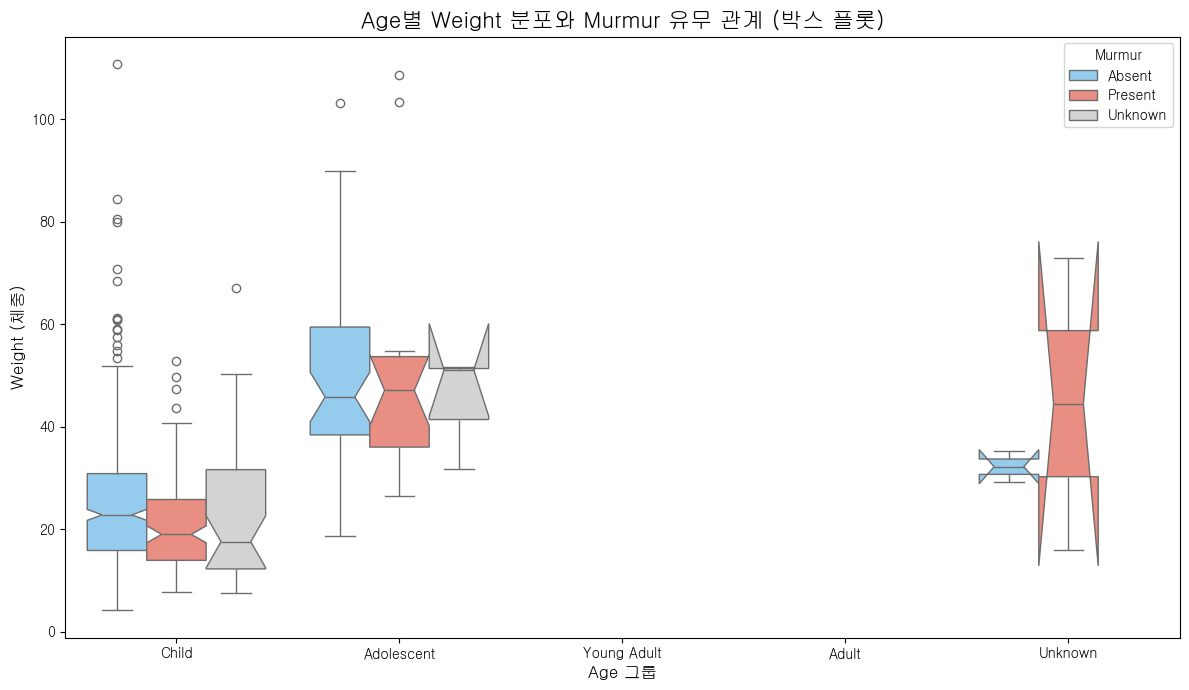

In [ ]:
age_order_full = ['Child', 'Adolescent', 'Young Adult', 'Adult', 'Unknown']
df['Age'] = pd.Categorical(df['Age'], categories=age_order_full, ordered=True)

df_plot = df.dropna(subset=['Weight', 'Murmur']).copy()

plt.figure(figsize=(12, 7))

sns.boxplot(x='Age', y='Weight', hue='Murmur', data=df_plot,
            order=age_order_full, 
            hue_order=['Absent', 'Present', 'Unknown'],
            palette={'Absent': 'lightskyblue', 'Present': 'salmon', 'Unknown': 'lightgray'},
            notch=True) 

plt.title('Age별 Weight 분포와 Murmur 유무 관계 (박스 플롯)', fontsize=16)
plt.xlabel('Age 그룹', fontsize=12)
plt.ylabel('Weight (체중)', fontsize=12)
plt.legend(title='Murmur', loc='upper right')
plt.tight_layout()
plt.show()

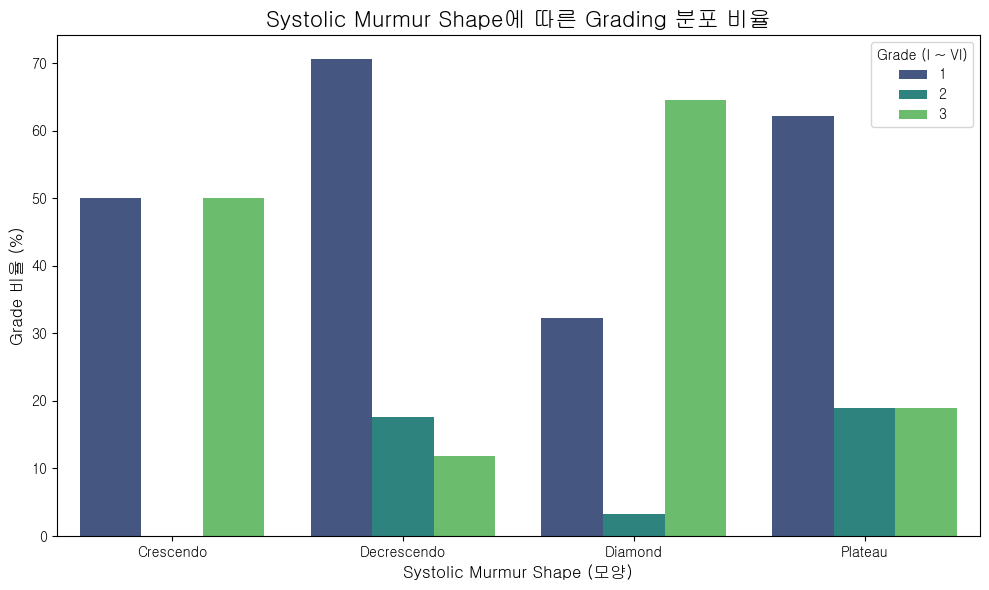

In [ ]:
df_present = df[df['Murmur'] == 'Present'].copy()
roman_to_int = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}

def extract_grade_roman(grade_str):
    if pd.isna(grade_str): return np.nan
    try:
        roman_numeral = grade_str.split('/')[0]
        return roman_to_int.get(roman_numeral, np.nan)
    except:
        return np.nan

df_present['Systolic Murmur Grade'] = df_present['Systolic murmur grading'].apply(extract_grade_roman)

df_plot = df_present.dropna(subset=['Systolic murmur shape', 'Systolic Murmur Grade']).copy()
df_plot['Systolic Murmur Grade'] = df_plot['Systolic Murmur Grade'].astype(int).astype(str) # Grading을 범주형으로 사용

crosstab_shape_grade = pd.crosstab(df_plot['Systolic murmur shape'], df_plot['Systolic Murmur Grade'], normalize='index') * 100
crosstab_shape_grade_melted = crosstab_shape_grade.round(1).reset_index().melt(
    id_vars='Systolic murmur shape', var_name='Grade', value_name='Percentage'
)

plt.figure(figsize=(10, 6))

sns.barplot(x='Systolic murmur shape', y='Percentage', hue='Grade', data=crosstab_shape_grade_melted,
            palette='viridis',
            hue_order=[str(i) for i in sorted(df_plot['Systolic Murmur Grade'].astype(int).unique())])

plt.title('Systolic Murmur Shape에 따른 Grading 분포 비율', fontsize=16)
plt.xlabel('Systolic Murmur Shape (모양)', fontsize=12)
plt.ylabel('Grade 비율 (%)', fontsize=12)
plt.legend(title='Grade (I ~ VI)', loc='upper right')
plt.tight_layout()
plt.show()

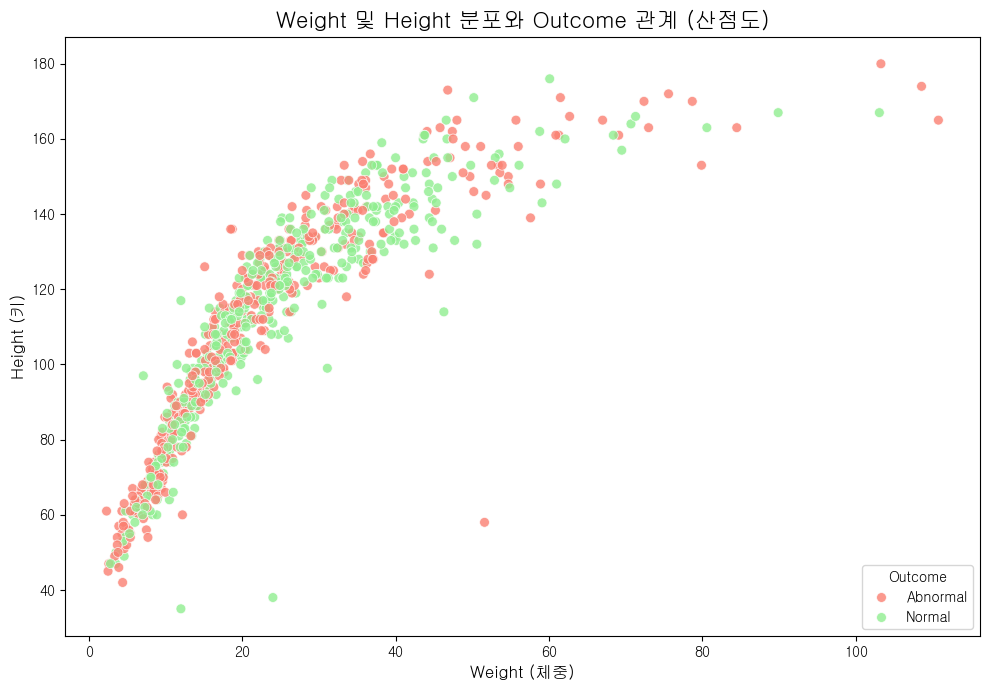

In [ ]:
df_plot = df.dropna(subset=['Height', 'Weight', 'Outcome']).copy()

plt.figure(figsize=(10, 7))

sns.scatterplot(x='Weight', y='Height', hue='Outcome', data=df_plot,
                palette={'Abnormal': 'salmon', 'Normal': 'lightgreen'},
                s=50, 
                alpha=0.8) 

plt.title('Weight 및 Height 분포와 Outcome 관계 (산점도)', fontsize=16)
plt.xlabel('Weight (체중)', fontsize=12)
plt.ylabel('Height (키)', fontsize=12)
plt.legend(title='Outcome', loc='lower right')
plt.tight_layout()
plt.show()

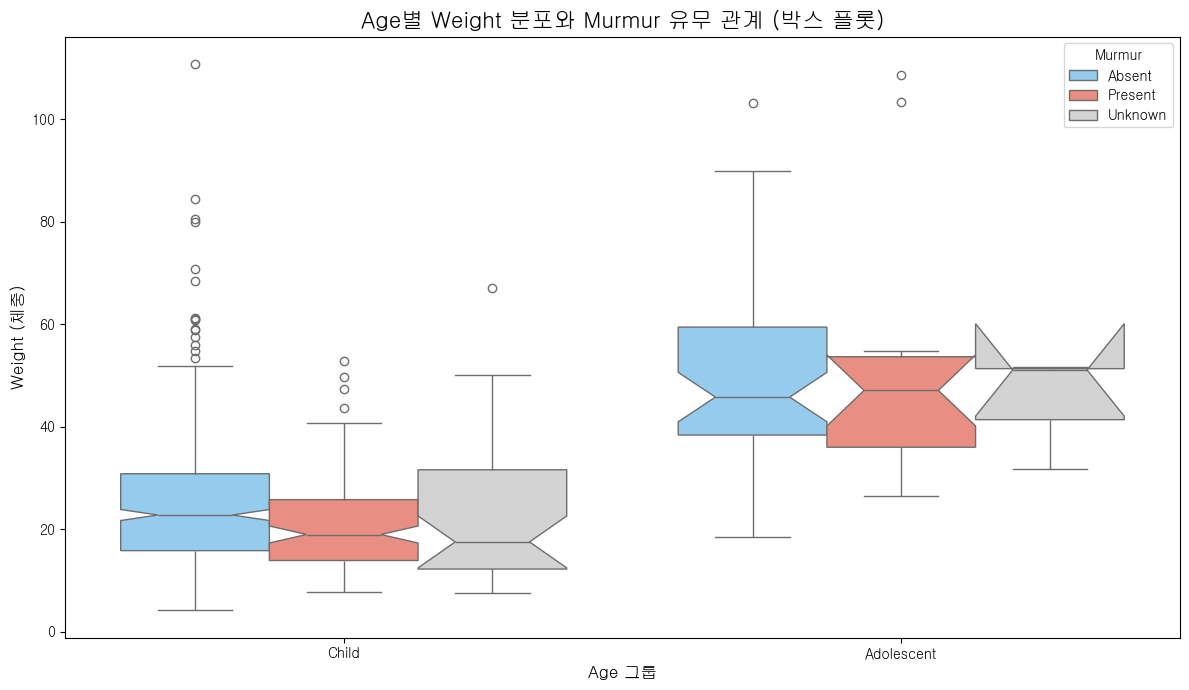

In [ ]:
age_order_full = ['Infant', 'Child', 'Adolescent', 'Neonate']
df['Age'] = pd.Categorical(df['Age'], categories=age_order_full, ordered=True)

df_plot_1 = df.dropna(subset=['Weight', 'Murmur']).copy()

age_order_safe = df_plot_1['Age'].dropna().unique().tolist()

plt.figure(figsize=(12, 7))

sns.boxplot(x='Age', y='Weight', hue='Murmur', data=df_plot_1,
            order=age_order_safe,
            hue_order=['Absent', 'Present', 'Unknown'],
            palette={'Absent': 'lightskyblue', 'Present': 'salmon', 'Unknown': 'lightgray'},
            notch=True) 

plt.title('Age별 Weight 분포와 Murmur 유무 관계 (박스 플롯)', fontsize=16)
plt.xlabel('Age 그룹', fontsize=12)
plt.ylabel('Weight (체중)', fontsize=12)
plt.legend(title='Murmur', loc='upper right')
plt.tight_layout()
plt.show()

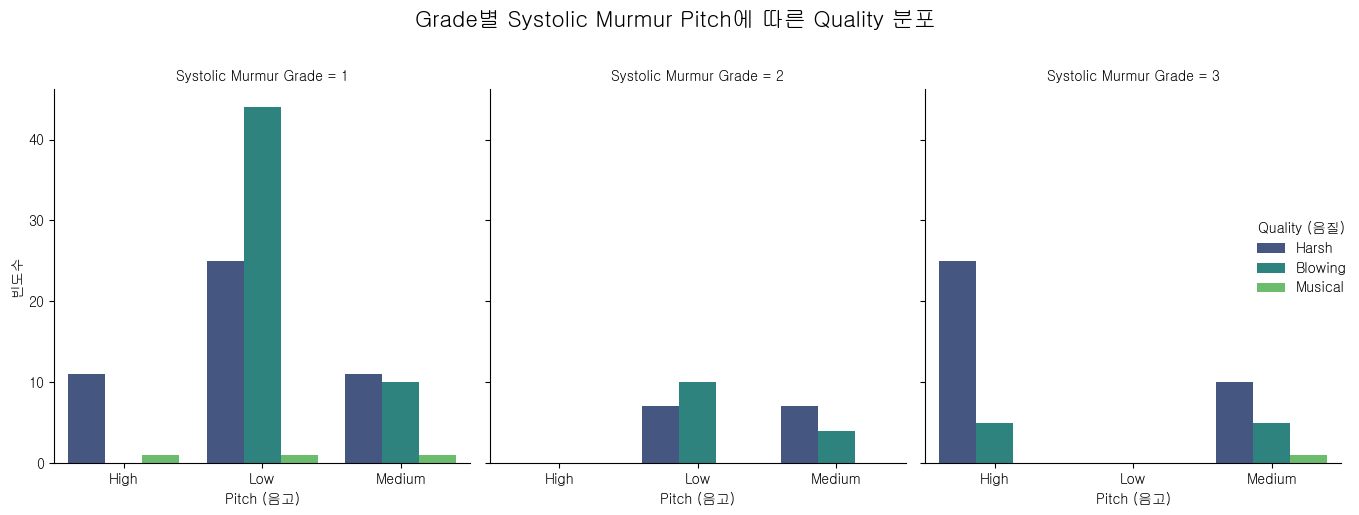

In [ ]:
df_present = df[df['Murmur'] == 'Present'].copy()
roman_to_int = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}

def extract_grade_roman(grade_str):
    if pd.isna(grade_str): return np.nan
    try:
        roman_numeral = grade_str.split('/')[0]
        return roman_to_int.get(roman_numeral, np.nan)
    except:
        return np.nan

df_present['Systolic Murmur Grade'] = df_present['Systolic murmur grading'].apply(extract_grade_roman)

df_plot_2 = df_present.dropna(subset=['Systolic murmur pitch', 'Systolic murmur quality', 'Systolic Murmur Grade']).copy()
df_plot_2['Systolic Murmur Grade'] = df_plot_2['Systolic Murmur Grade'].astype(int)

if not df_plot_2.empty:
    g = sns.catplot(
        data=df_plot_2,
        x='Systolic murmur pitch',
        hue='Systolic murmur quality',
        col='Systolic Murmur Grade', 
        kind='count',
        palette='viridis',
        col_order=sorted(df_plot_2['Systolic Murmur Grade'].unique()),
        height=5, 
        aspect=0.8
    )

    g.fig.suptitle('Grade별 Systolic Murmur Pitch에 따른 Quality 분포', y=1.02, fontsize=16)
    g.set_axis_labels('Pitch (음고)', '빈도수')
    g.legend.set_title('Quality (음질)')
    plt.tight_layout()
    plt.show()
else:
    print("경고: Systolic murmur pitch/quality/grade 조합을 위한 데이터가 부족하여 시각화를 건너뜁니다.")

### 3차

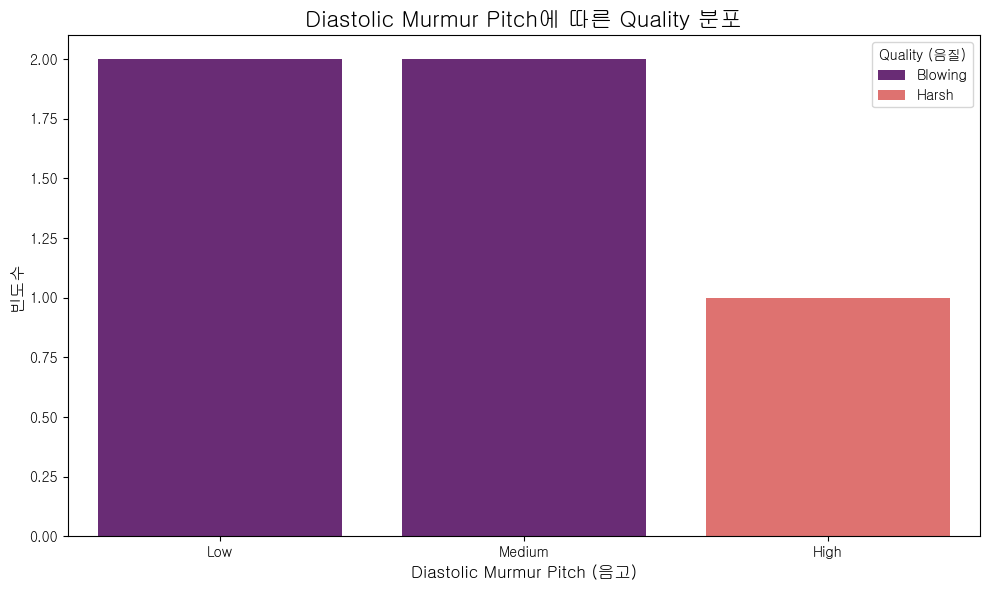

In [ ]:
df_diastolic_present = df[
    (df['Diastolic murmur timing'].notna()) & (df['Diastolic murmur timing'] != 'nan')
].copy()

df_plot_2 = df_diastolic_present.dropna(subset=['Diastolic murmur pitch', 'Diastolic murmur quality']).copy()

if not df_plot_2.empty:
    plt.figure(figsize=(10, 6))

    sns.countplot(x='Diastolic murmur pitch', hue='Diastolic murmur quality', data=df_plot_2,
                  palette='magma',
                  order=df_plot_2['Diastolic murmur pitch'].value_counts().index)

    plt.title('Diastolic Murmur Pitch에 따른 Quality 분포', fontsize=16)
    plt.xlabel('Diastolic Murmur Pitch (음고)', fontsize=12)
    plt.ylabel('빈도수', fontsize=12)
    plt.legend(title='Quality (음질)')
    plt.tight_layout()
    plt.show()
else:
    print("경고: Diastolic Murmur (이완기 잡음)의 Pitch와 Quality를 분석할 유효한 데이터가 부족하여 시각화를 건너뜁니다.")

### 4차

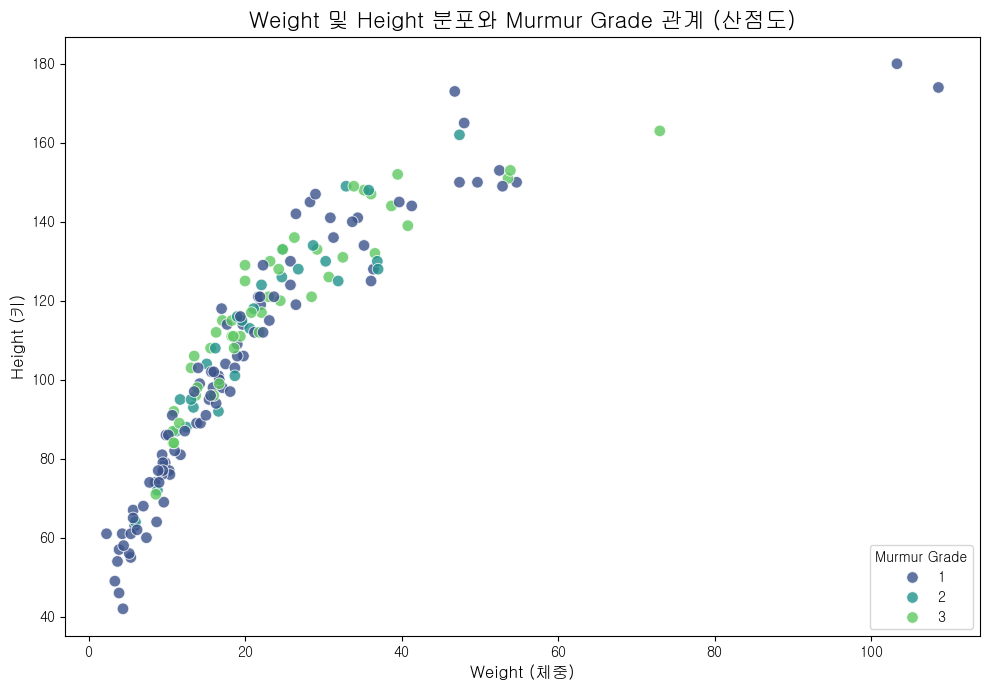

In [ ]:
roman_to_int = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
def extract_grade_roman(grade_str):
    if pd.isna(grade_str): return np.nan
    try:
        roman_numeral = grade_str.split('/')[0]
        return roman_to_int.get(roman_numeral, np.nan)
    except:
        return np.nan

df['Systolic Murmur Grade (Num)'] = df['Systolic murmur grading'].apply(extract_grade_roman)

df_plot = df.dropna(subset=['Height', 'Weight', 'Murmur', 'Systolic Murmur Grade (Num)']).copy()
df_plot['Systolic Murmur Grade (Num)'] = df_plot['Systolic Murmur Grade (Num)'].astype(int).astype(str)

plt.figure(figsize=(10, 7))

sns.scatterplot(x='Weight', y='Height', hue='Systolic Murmur Grade (Num)', data=df_plot,
                palette='viridis',
                s=70, 
                alpha=0.8, 
                hue_order=sorted(df_plot['Systolic Murmur Grade (Num)'].unique())) 

plt.title('Weight 및 Height 분포와 Murmur Grade 관계 (산점도)', fontsize=16)
plt.xlabel('Weight (체중)', fontsize=12)
plt.ylabel('Height (키)', fontsize=12)
plt.legend(title='Murmur Grade', loc='lower right')
plt.tight_layout()
plt.show()

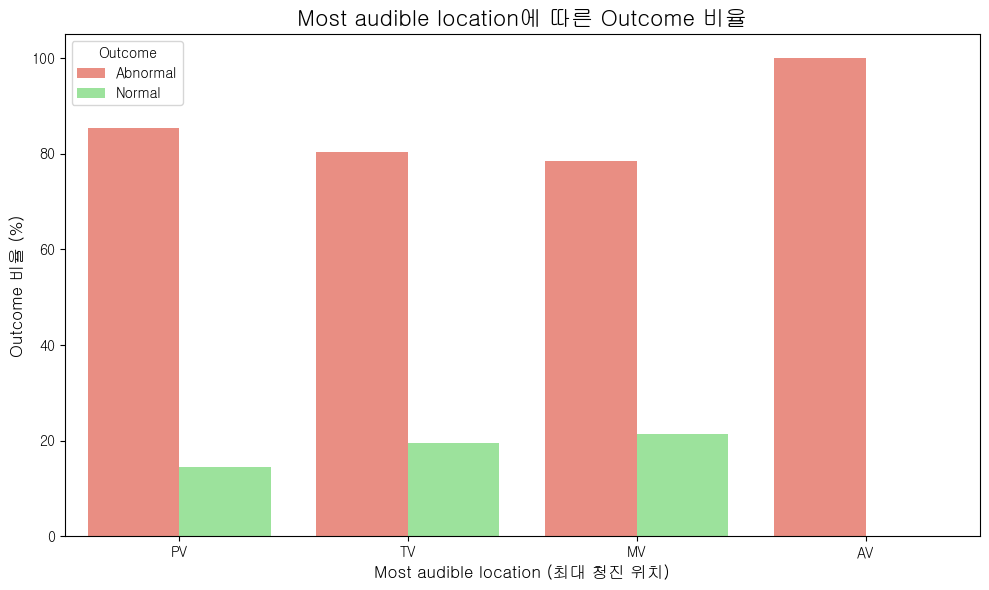

In [ ]:
df_plot = df.dropna(subset=['Most audible location', 'Outcome']).copy()

crosstab_location_outcome = pd.crosstab(df_plot['Most audible location'], df_plot['Outcome'], normalize='index') * 100
crosstab_location_outcome_melted = crosstab_location_outcome.round(1).reset_index().melt(
    id_vars='Most audible location', var_name='Outcome', value_name='Percentage'
)

plt.figure(figsize=(10, 6))

sns.barplot(x='Most audible location', y='Percentage', hue='Outcome', data=crosstab_location_outcome_melted,
            palette={'Abnormal': 'salmon', 'Normal': 'lightgreen'},
            hue_order=['Abnormal', 'Normal'],
            order=df_plot['Most audible location'].value_counts().index)

plt.title('Most audible location에 따른 Outcome 비율', fontsize=16)
plt.xlabel('Most audible location (최대 청진 위치)', fontsize=12)
plt.ylabel('Outcome 비율 (%)', fontsize=12)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

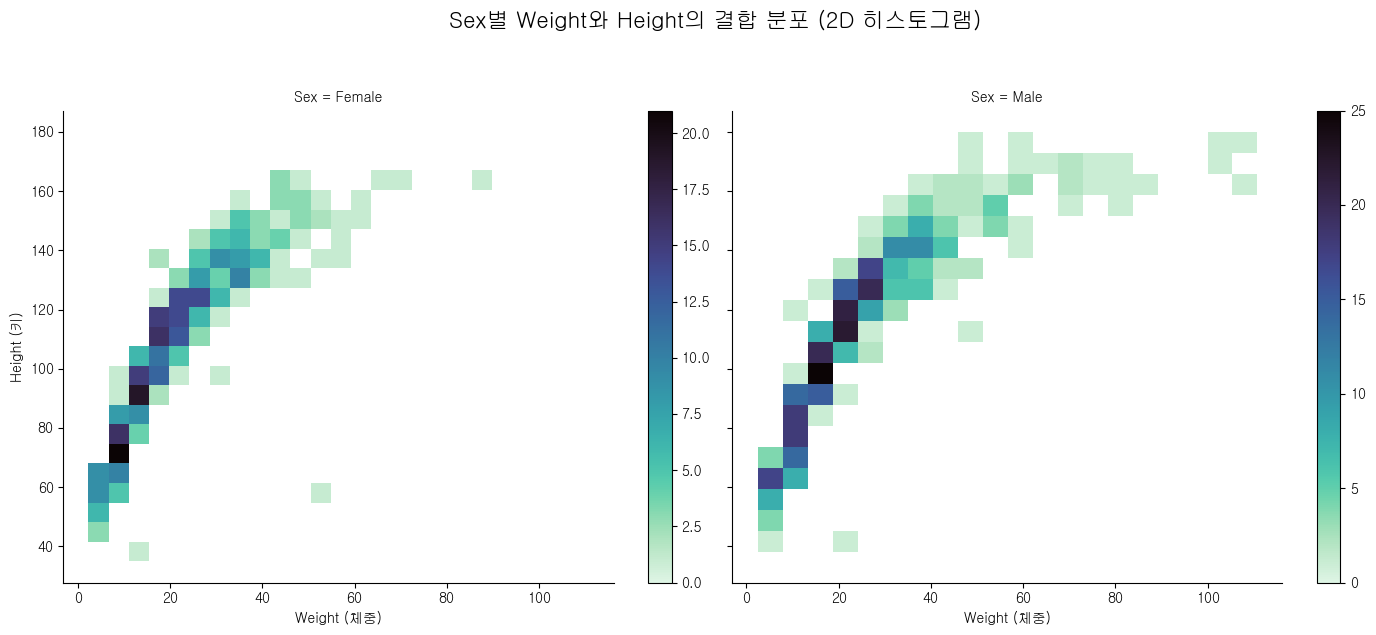

In [ ]:
df_plot = df.dropna(subset=['Height', 'Weight', 'Sex']).copy()
df_plot = df_plot[df_plot['Sex'].isin(['Male', 'Female'])]

g = sns.FacetGrid(df_plot, col="Sex", height=6, aspect=1.2)
g.map_dataframe(sns.histplot, x="Weight", y="Height", bins=20, cbar=True, cmap="mako_r")

g.fig.suptitle('Sex별 Weight와 Height의 결합 분포 (2D 히스토그램)', y=1.05, fontsize=16)
g.set_axis_labels('Weight (체중)', 'Height (키)')
plt.tight_layout()
plt.show()

### 5차

C:\Users\dongseop\AppData\Local\Temp\ipykernel_8536\727712898.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crosstab_age_sex_outcome = df_plot_1.groupby(['Age', 'Sex', 'Outcome']).size().unstack(fill_value=0)


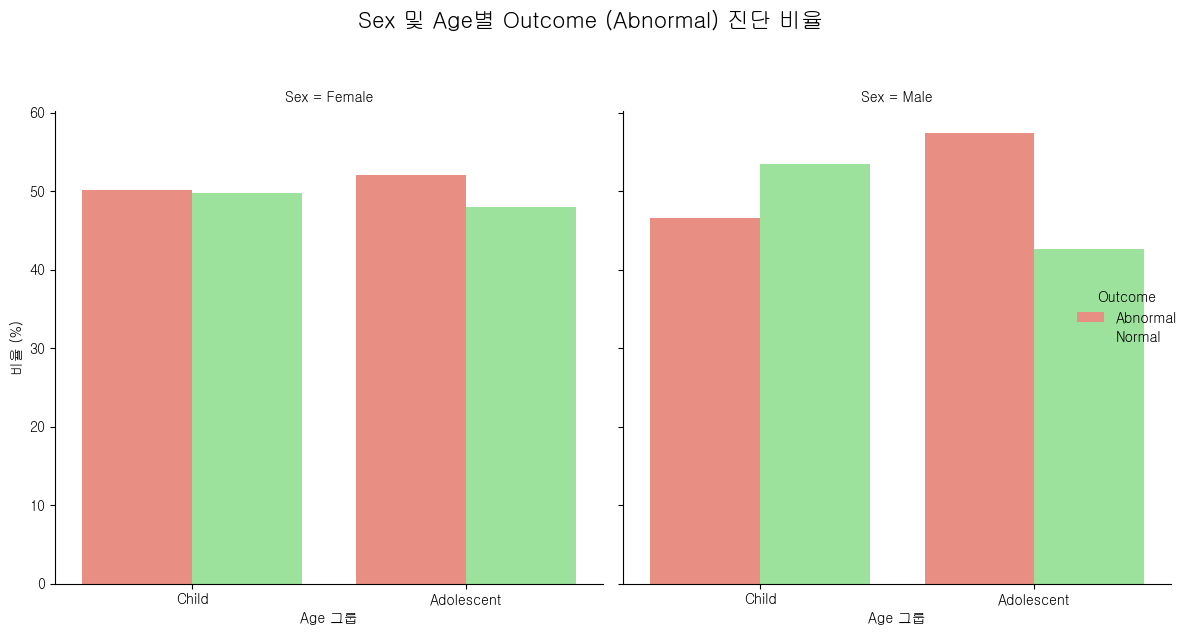

In [ ]:
age_order_full = ['Infant', 'Child', 'Adolescent', 'Neonate']
df['Age'] = pd.Categorical(df['Age'], categories=age_order_full, ordered=True)

df_plot_1 = df.dropna(subset=['Age', 'Sex', 'Outcome']).copy()

crosstab_age_sex_outcome = df_plot_1.groupby(['Age', 'Sex', 'Outcome']).size().unstack(fill_value=0)
crosstab_age_sex_outcome = crosstab_age_sex_outcome.div(crosstab_age_sex_outcome.sum(axis=1), axis=0) * 100
crosstab_age_sex_outcome_melted = crosstab_age_sex_outcome.round(1).reset_index().melt(
    id_vars=['Age', 'Sex'], var_name='Outcome', value_name='Percentage'
)

age_order_safe = df_plot_1['Age'].dropna().unique().tolist()
sex_order = ['Female', 'Male']
hue_order = ['Abnormal', 'Normal']

g = sns.catplot(
    data=crosstab_age_sex_outcome_melted,
    x='Age',
    y='Percentage',
    hue='Outcome',
    col='Sex', 
    kind='bar',
    palette={'Abnormal': 'salmon', 'Normal': 'lightgreen'},
    col_order=sex_order,
    order=age_order_safe, 
    hue_order=hue_order,
    height=6, 
    aspect=0.9
)

g.fig.suptitle('Sex 및 Age별 Outcome (Abnormal) 진단 비율', y=1.05, fontsize=16)
g.set_axis_labels('Age 그룹', '비율 (%)')
g.legend.set_title('Outcome')
plt.tight_layout()
plt.show()

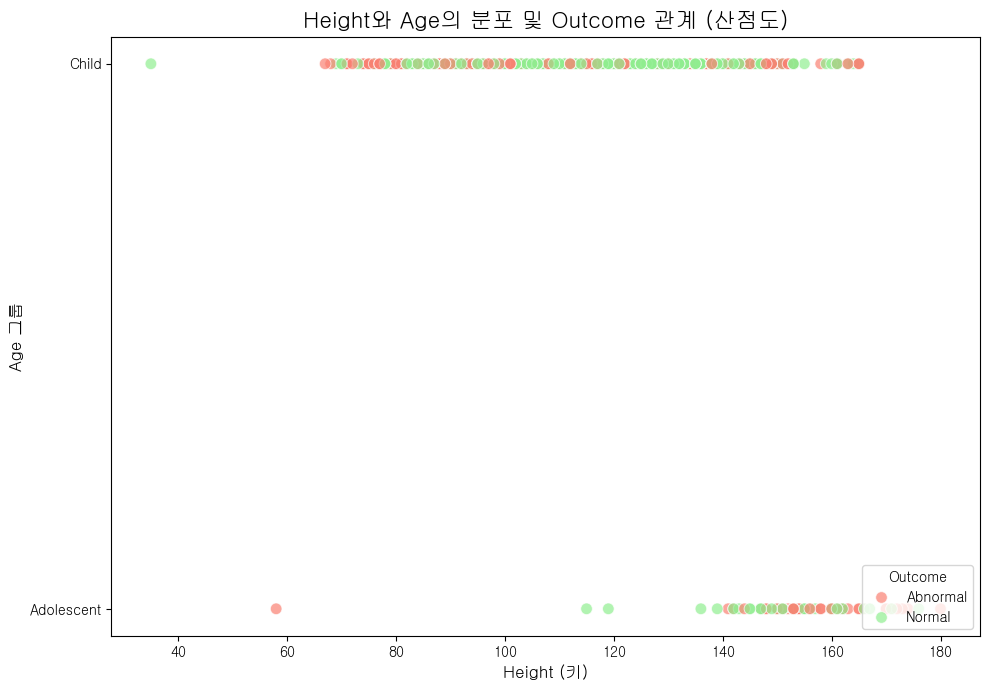

In [ ]:
df_plot = df.dropna(subset=['Age', 'Height', 'Outcome']).copy()
age_order_full = ['Infant', 'Child', 'Adolescent', 'Neonate']
df_plot['Age'] = pd.Categorical(df_plot['Age'], categories=age_order_full, ordered=True)

plt.figure(figsize=(10, 7))

sns.scatterplot(x='Height', y='Age', hue='Outcome', data=df_plot,
                palette={'Abnormal': 'salmon', 'Normal': 'lightgreen'},
                s=70, 
                alpha=0.7, 
                hue_order=['Abnormal', 'Normal']) 

plt.title('Height와 Age의 분포 및 Outcome 관계 (산점도)', fontsize=16)
plt.xlabel('Height (키)', fontsize=12)
plt.ylabel('Age 그룹', fontsize=12)
plt.legend(title='Outcome', loc='lower right')
plt.tight_layout()
plt.show()

### 클로드표

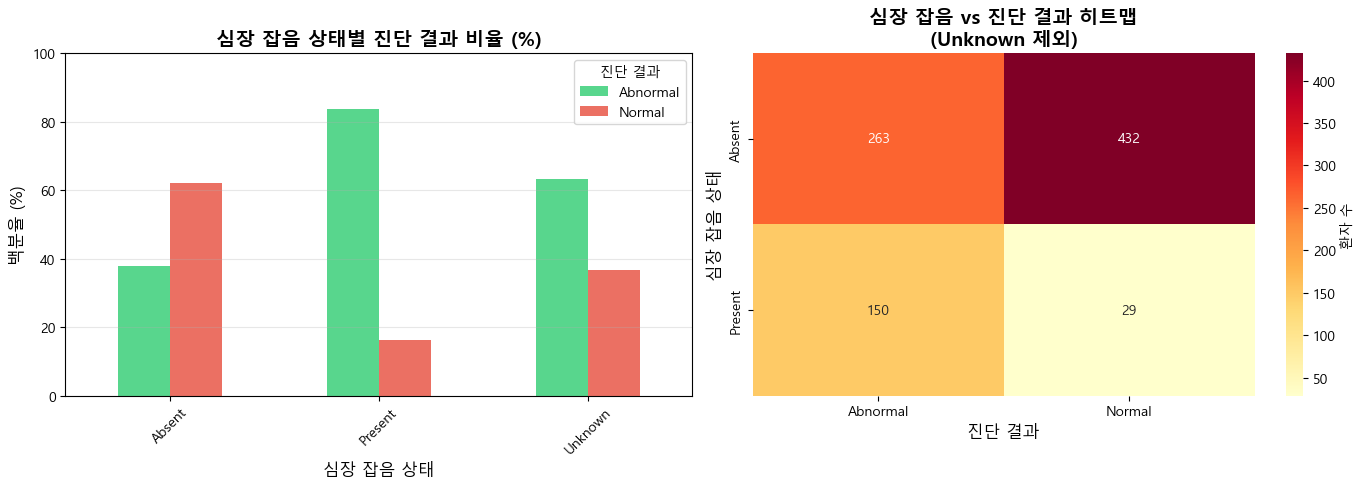

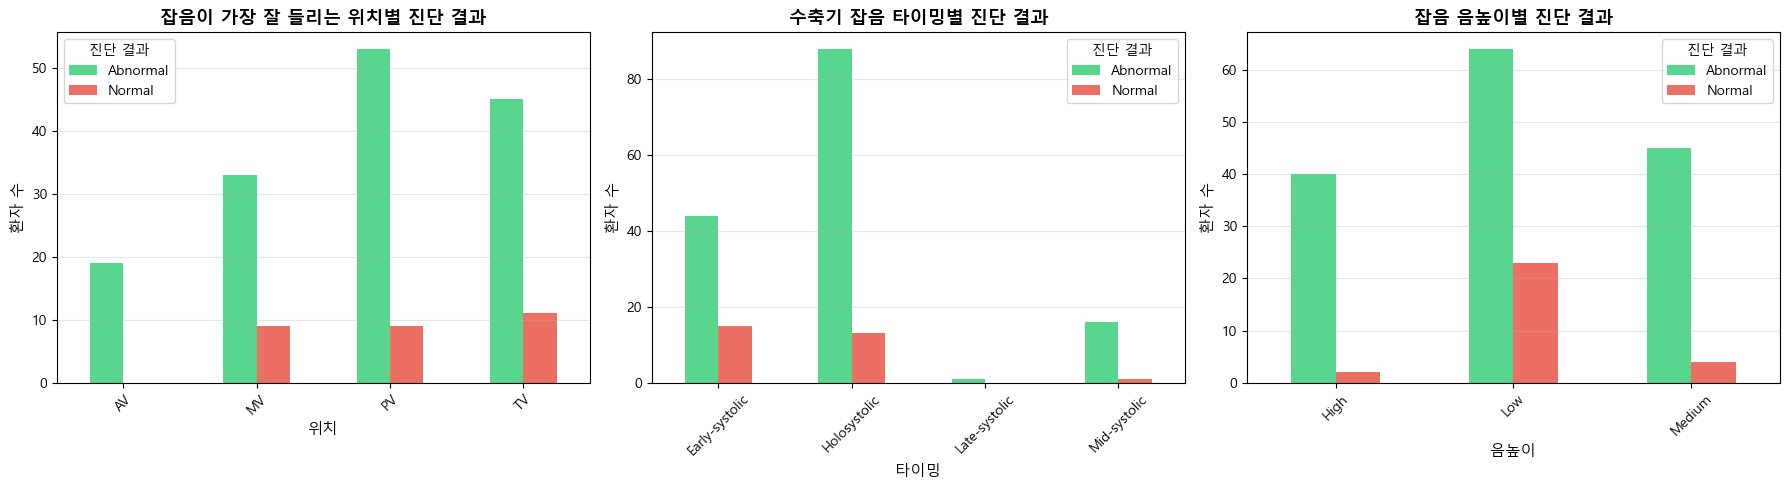

In [34]:
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    plt.rc('font', family='AppleGothic')
else:  # Linux
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


# 비율 교차표 계산
crosstab_pct = pd.crosstab(df['Murmur'], df['Outcome'], normalize='index') * 100

# Unknown 제외한 교차표 (히트맵용)
df_known = df[df['Murmur'] != 'Unknown'].copy()
contingency_table = pd.crosstab(df_known['Murmur'], df_known['Outcome'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 그래프 1: 심장 잡음 상태별 진단 결과 비율
crosstab_pct.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[0].set_title('심장 잡음 상태별 진단 결과 비율 (%)', fontsize=14, weight='bold')
axes[0].set_xlabel('심장 잡음 상태', fontsize=12)
axes[0].set_ylabel('백분율 (%)', fontsize=12)
axes[0].legend(title='진단 결과', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 100])

# 그래프 2: 심장 잡음 vs 진단 결과 히트맵
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrRd', 
            ax=axes[1], cbar_kws={'label': '환자 수'})
axes[1].set_title('심장 잡음 vs 진단 결과 히트맵\n(Unknown 제외)', 
                  fontsize=14, weight='bold')
axes[1].set_xlabel('진단 결과', fontsize=12)
axes[1].set_ylabel('심장 잡음 상태', fontsize=12)

plt.tight_layout()
plt.savefig('선택_그래프1_심장잡음과_진단결과.png', dpi=300, bbox_inches='tight')
plt.show()

df_present = df[df['Murmur'] == 'Present'].copy()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 그래프 1: 잡음이 가장 잘 들리는 위치별 진단 결과
ax1 = axes[0]
location_data = pd.crosstab(df_present['Most audible location'], df_present['Outcome'])
location_data.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'], alpha=0.8)
ax1.set_title('잡음이 가장 잘 들리는 위치별 진단 결과', fontsize=13, weight='bold')
ax1.set_xlabel('위치', fontsize=11)
ax1.set_ylabel('환자 수', fontsize=11)
ax1.legend(title='진단 결과')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# 그래프 2: 수축기 잡음 타이밍별 진단 결과
ax2 = axes[1]
timing_data = pd.crosstab(df_present['Systolic murmur timing'], df_present['Outcome'])
timing_data.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c'], alpha=0.8)
ax2.set_title('수축기 잡음 타이밍별 진단 결과', fontsize=13, weight='bold')
ax2.set_xlabel('타이밍', fontsize=11)
ax2.set_ylabel('환자 수', fontsize=11)
ax2.legend(title='진단 결과')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 그래프 3: 잡음 음높이별 진단 결과
ax3 = axes[2]
pitch_data = pd.crosstab(df_present['Systolic murmur pitch'], df_present['Outcome'])
pitch_data.plot(kind='bar', ax=ax3, color=['#2ecc71', '#e74c3c'], alpha=0.8)
ax3.set_title('잡음 음높이별 진단 결과', fontsize=13, weight='bold')
ax3.set_xlabel('음높이', fontsize=11)
ax3.set_ylabel('환자 수', fontsize=11)
ax3.legend(title='진단 결과')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('선택_그래프2_심장잡음_세부특성.png', dpi=300, bbox_inches='tight')
plt.show()

## int화

### Age값 수치형 변환

In [22]:
df['Age'].value_counts(dropna=False)

Age
Child         664
Infant        126
NaN            74
Adolescent     72
Neonate         6
Name: count, dtype: int64

In [25]:
# 나이 그룹의 순서 (어린 순서)에 따른 매핑 딕셔너리 정의
# 신생아(Neonate)부터 청소년(Adolescent) 순으로 1부터 4까지 할당
age_ordinal_mapping = {
    'Neonate': 1,
    'Infant': 2,
    'Child': 3,
    'Adolescent': 4,
}

# .map() 함수를 사용하여 'Age' 컬럼을 'Age_Ordinal' 컬럼으로 변환
# 매핑 딕셔너리에 없는 NaN 값은 자동으로 NaN으로 처리됩니다.
df['Age_Ordinal'] = df['Age'].map(age_ordinal_mapping)

# 결과 확인
print(df[['Age', 'Age_Ordinal']].drop_duplicates().sort_values(by='Age_Ordinal', ascending=True))

            Age  Age_Ordinal
307     Neonate          1.0
38       Infant          2.0
0         Child          3.0
12   Adolescent          4.0
84          NaN          NaN


In [26]:
df['Age_Ordinal'].value_counts(dropna=False)

Age_Ordinal
3.0    664
2.0    126
NaN     74
4.0     72
1.0      6
Name: count, dtype: int64

### Sex값 수치형 변환

In [41]:
import pandas as pd
import numpy as np


# 'Female': 0, 'Male': 1로 매핑 정의
sex_mapping = {'Female': 0, 'Male': 1}

# .map() 함수를 사용하여 'Sex_Binary' 컬럼 생성
df['Sex_Binary'] = df['Sex'].map(sex_mapping)

In [42]:
df['Sex_Binary'].value_counts(dropna=False)

Sex_Binary
0    486
1    456
Name: count, dtype: int64

### Pregnancy status값 수치형 변환

In [69]:
import pandas as pd
import numpy as np


# 'Female': 0, 'Male': 1로 매핑 정의
status_mapping = {False: 0, True: 1}

# .map() 함수를 사용하여 'Sex_Binary' 컬럼 생성
df['Pregnancy_status_Binary'] = df['Pregnancy status'].map(status_mapping)

In [70]:
df['Pregnancy status'].value_counts(dropna=False)

Pregnancy status
False    872
True      70
Name: count, dtype: int64

In [71]:
df['Pregnancy_status_Binary'].value_counts(dropna=False)

Pregnancy_status_Binary
0    872
1     70
Name: count, dtype: int64

### Murmur locations값 

In [74]:
import pandas as pd
import numpy as np

locations_col = 'Murmur locations'
valve_list = ['AV', 'PV', 'TV', 'MV']

# 1. 밸브 위치별 이진 피쳐 생성 (Decomposition)
for valve in valve_list:
    # 예: 'Murmur_at_AV', 'Murmur_at_PV' 등의 컬럼 생성
    # 문자열에 해당 밸브 코드가 포함되어 있는지 확인하여 1/0으로 변환
    df[f'Murmur_at_{valve}'] = df[locations_col].str.contains(valve, na=False).astype(int)

# 2. 심잡음 위치 개수 카운트 (Count)
# '+' 기호를 기준으로 분리하여 개수를 세고, NaN 값은 0으로 처리
df['Num_Murmur_Locations'] = df[locations_col].apply(
    lambda x: len(x.split('+')) if pd.notna(x) else 0
)

# 결과 확인: 원본 컬럼과 변환된 컬럼들 출력
print(df[[locations_col, 'Num_Murmur_Locations', 'Murmur_at_AV', 'Murmur_at_PV', 'Murmur_at_TV', 'Murmur_at_MV']])

    Murmur locations  Num_Murmur_Locations  Murmur_at_AV  Murmur_at_PV  \
0                NaN                     0             0             0   
1        AV+MV+PV+TV                     4             1             1   
2                NaN                     0             0             0   
3                 TV                     1             0             0   
4        AV+MV+PV+TV                     4             1             1   
..               ...                   ...           ...           ...   
937              NaN                     0             0             0   
938              NaN                     0             0             0   
939            MV+TV                     2             0             0   
940              NaN                     0             0             0   
941              NaN                     0             0             0   

     Murmur_at_TV  Murmur_at_MV  
0               0             0  
1               1             1  
2        

### Most audible location

In [75]:
df['Most audible location'].value_counts()

Most audible location
PV    62
TV    56
MV    42
AV    19
Name: count, dtype: int64

In [76]:
import pandas as pd
import numpy as np

# --- Most audible location 수치형 매핑 ---
# 위치 간에 순서가 없으므로, 임의의 정수를 할당합니다.
location_mapping = {
    'AV': 1,  # 대동맥판
    'PV': 2,  # 폐동맥판
    'TV': 3,  # 삼첨판
    'MV': 4   # 승모판
}

# .map() 함수를 사용하여 'Audible_Location_Mapped' 컬럼 생성
# NaN 값은 매핑하지 않고 그대로 NaN으로 유지됩니다.
df['Audible_Location_Mapped'] = df['Most audible location'].map(location_mapping)

# 결과 확인: 원본 컬럼과 변환된 컬럼 출력
print("--- Most audible location 수치형 매핑 결과 (하위 10개 행) ---")
print(df[['Most audible location', 'Audible_Location_Mapped']])

--- Most audible location 수치형 매핑 결과 (하위 10개 행) ---
    Most audible location  Audible_Location_Mapped
0                     NaN                      NaN
1                      TV                      3.0
2                     NaN                      NaN
3                      TV                      3.0
4                      PV                      2.0
..                    ...                      ...
937                   NaN                      NaN
938                   NaN                      NaN
939                    TV                      3.0
940                   NaN                      NaN
941                   NaN                      NaN

[942 rows x 2 columns]


### Systolic murmur timing

In [78]:
import pandas as pd
import numpy as np


# --- Systolic murmur timing 수치형 매핑 ---
timing_mapping = {
    'Early-systolic': 1,
    'Mid-systolic': 2,
    'Late-systolic': 3,
    'Holosystolic': 4
}

# .map() 함수를 사용하여 'Systolic_Timing_Mapped' 컬럼 생성
df['Systolic_Timing_Mapped'] = df['Systolic murmur timing'].map(timing_mapping)

# 결과 확인
print(df[['Systolic murmur timing', 'Systolic_Timing_Mapped']])

    Systolic murmur timing  Systolic_Timing_Mapped
0                      NaN                     NaN
1             Holosystolic                     4.0
2                      NaN                     NaN
3             Holosystolic                     4.0
4           Early-systolic                     1.0
..                     ...                     ...
937                    NaN                     NaN
938                    NaN                     NaN
939         Early-systolic                     1.0
940                    NaN                     NaN
941                    NaN                     NaN

[942 rows x 2 columns]


### Systolic murmur shape

In [79]:
df['Systolic murmur shape'].value_counts()

Systolic murmur shape
Plateau        111
Decrescendo     34
Diamond         31
Crescendo        2
Name: count, dtype: int64

In [80]:
# 심잡음 모양 임의 수치 매핑
shape_mapping = {
    'Crescendo': 1,
    'Decrescendo': 2,
    'Diamond': 3,
    'Plateau': 4 
}
df['Systolic_Shape_Mapped'] = df['Systolic murmur shape'].map(shape_mapping)

# 결과 확인
print("--- Systolic murmur shape 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Systolic murmur shape', 'Systolic_Shape_Mapped']])

--- Systolic murmur shape 수치형 매핑 결과 (상위 10개 행) ---
    Systolic murmur shape  Systolic_Shape_Mapped
0                     NaN                    NaN
1                 Diamond                    3.0
2                     NaN                    NaN
3                 Plateau                    4.0
4                 Plateau                    4.0
..                    ...                    ...
937                   NaN                    NaN
938                   NaN                    NaN
939               Plateau                    4.0
940                   NaN                    NaN
941                   NaN                    NaN

[942 rows x 2 columns]


### Systolic murmur grading

In [81]:
df['Systolic murmur grading'].value_counts()

Systolic murmur grading
I/VI      104
III/VI     46
II/VI      28
Name: count, dtype: int64

In [88]:
# 심잡음 모양 임의 수치 매핑
shape_mapping = {
    'I/VI': 1,
    'II/VI': 2,
    'III/VI': 3,
}
df['Systolic grading Mapped'] = df['Systolic murmur grading'].map(shape_mapping)

# 결과 확인
print("--- Systolic murmur grading 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Systolic murmur grading', 'Systolic grading Mapped']])

--- Systolic murmur grading 수치형 매핑 결과 (상위 10개 행) ---
    Systolic murmur grading  Systolic grading Mapped
0                       NaN                      NaN
1                    III/VI                      3.0
2                       NaN                      NaN
3                      I/VI                      1.0
4                     II/VI                      2.0
..                      ...                      ...
937                     NaN                      NaN
938                     NaN                      NaN
939                    I/VI                      1.0
940                     NaN                      NaN
941                     NaN                      NaN

[942 rows x 2 columns]


### Systolic murmur pitch

In [89]:
df['Systolic murmur pitch'].value_counts()

Systolic murmur pitch
Low       87
Medium    49
High      42
Name: count, dtype: int64

In [91]:
import pandas as pd
import numpy as np

# 심잡음 음높이 임의 수치 매핑
pitch_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
}
df['Systolic_Pitch_Mapped'] = df['Systolic murmur pitch'].map(pitch_mapping)

# 결과 확인
print("--- Systolic murmur pitch 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Systolic murmur pitch', 'Systolic_Pitch_Mapped']])

--- Systolic murmur pitch 수치형 매핑 결과 (상위 10개 행) ---
    Systolic murmur pitch  Systolic_Pitch_Mapped
0                     NaN                    NaN
1                    High                    3.0
2                     NaN                    NaN
3                     Low                    1.0
4                     Low                    1.0
..                    ...                    ...
937                   NaN                    NaN
938                   NaN                    NaN
939                   Low                    1.0
940                   NaN                    NaN
941                   NaN                    NaN

[942 rows x 2 columns]


### Systolic murmur quality

In [92]:
df['Systolic murmur quality'].value_counts()

Systolic murmur quality
Harsh      96
Blowing    78
Musical     4
Name: count, dtype: int64

In [93]:
import pandas as pd
import numpy as np

# 심잡음 음질 임의 수치 매핑
quality_mapping = {
    'Blowing': 1,
    'Harsh': 2,
    'Musical': 3,
}
df['Systolic_Quality_Mapped'] = df['Systolic murmur quality'].map(quality_mapping)

# 결과 확인
print("--- Systolic murmur quality 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Systolic murmur quality', 'Systolic_Quality_Mapped']])

--- Systolic murmur quality 수치형 매핑 결과 (상위 10개 행) ---
    Systolic murmur quality  Systolic_Quality_Mapped
0                       NaN                      NaN
1                     Harsh                      2.0
2                       NaN                      NaN
3                   Blowing                      1.0
4                     Harsh                      2.0
..                      ...                      ...
937                     NaN                      NaN
938                     NaN                      NaN
939                 Blowing                      1.0
940                     NaN                      NaN
941                     NaN                      NaN

[942 rows x 2 columns]


### Diastolic murmur timing

In [94]:
import pandas as pd
import numpy as np
# 이완기 심잡음 타이밍 순서 매핑
timing_mapping = {
    'Early-diastolic': 1,
    'Mid-diastolic': 2,
    'Holodiastolic': 3
}

# .map() 함수를 사용하여 'Diastolic_Timing_Mapped' 컬럼 생성
df['Diastolic_Timing_Mapped'] = df['Diastolic murmur timing'].map(timing_mapping)

# 결과 확인
print("--- Diastolic murmur timing 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Diastolic murmur timing', 'Diastolic_Timing_Mapped']])

--- Diastolic murmur timing 수치형 매핑 결과 (상위 10개 행) ---
    Diastolic murmur timing  Diastolic_Timing_Mapped
0                       NaN                      NaN
1                       NaN                      NaN
2                       NaN                      NaN
3                       NaN                      NaN
4                       NaN                      NaN
..                      ...                      ...
937                     NaN                      NaN
938                     NaN                      NaN
939                     NaN                      NaN
940                     NaN                      NaN
941                     NaN                      NaN

[942 rows x 2 columns]


### Diastolic murmur shape

In [95]:
import pandas as pd
import numpy as np

# 심잡음 모양 임의 수치 매핑
shape_mapping = {
    'Decrescendo': 1,
    'Plateau': 2,
}
df['Diastolic_Shape_Mapped'] = df['Diastolic murmur shape'].map(shape_mapping)

# 결과 확인
print("--- Diastolic murmur shape 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Diastolic murmur shape', 'Diastolic_Shape_Mapped']])

--- Diastolic murmur shape 수치형 매핑 결과 (상위 10개 행) ---
    Diastolic murmur shape  Diastolic_Shape_Mapped
0                      NaN                     NaN
1                      NaN                     NaN
2                      NaN                     NaN
3                      NaN                     NaN
4                      NaN                     NaN
..                     ...                     ...
937                    NaN                     NaN
938                    NaN                     NaN
939                    NaN                     NaN
940                    NaN                     NaN
941                    NaN                     NaN

[942 rows x 2 columns]


### Diastolic murmur grading

In [96]:
# 심잡음 모양 임의 수치 매핑
shape_mapping = {
    'I/VI': 1,
    'II/VI': 2,
    'III/VI': 3,
}
df['Diastolic grading Mapped'] = df['Diastolic murmur grading'].map(shape_mapping)

# 결과 확인
print("--- Diastolic murmur grading 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Diastolic murmur grading', 'Diastolic grading Mapped']])

--- Diastolic murmur grading 수치형 매핑 결과 (상위 10개 행) ---
    Diastolic murmur grading  Diastolic grading Mapped
0                        NaN                       NaN
1                        NaN                       NaN
2                        NaN                       NaN
3                        NaN                       NaN
4                        NaN                       NaN
..                       ...                       ...
937                      NaN                       NaN
938                      NaN                       NaN
939                      NaN                       NaN
940                      NaN                       NaN
941                      NaN                       NaN

[942 rows x 2 columns]


### Diastolic murmur pitch

In [97]:
import pandas as pd
import numpy as np

# 심잡음 음높이 임의 수치 매핑
pitch_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
}
df['Diastolic_Pitch_Mapped'] = df['Diastolic murmur pitch'].map(pitch_mapping)

# 결과 확인
print("--- Diastolic murmur pitch 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Diastolic murmur pitch', 'Diastolic_Pitch_Mapped']])

--- Diastolic murmur pitch 수치형 매핑 결과 (상위 10개 행) ---
    Diastolic murmur pitch  Diastolic_Pitch_Mapped
0                      NaN                     NaN
1                      NaN                     NaN
2                      NaN                     NaN
3                      NaN                     NaN
4                      NaN                     NaN
..                     ...                     ...
937                    NaN                     NaN
938                    NaN                     NaN
939                    NaN                     NaN
940                    NaN                     NaN
941                    NaN                     NaN

[942 rows x 2 columns]


### Diastolic murmur quality

In [98]:
import pandas as pd
import numpy as np

# 심잡음 음질 임의 수치 매핑
quality_mapping = {
    'Blowing': 1,
    'Harsh': 2
}
df['Diastolic_Quality_Mapped'] = df['Diastolic murmur quality'].map(quality_mapping)

# 결과 확인
print("--- Diastolic murmur quality 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Diastolic murmur quality', 'Diastolic_Quality_Mapped']])

--- Diastolic murmur quality 수치형 매핑 결과 (상위 10개 행) ---
    Diastolic murmur quality  Diastolic_Quality_Mapped
0                        NaN                       NaN
1                        NaN                       NaN
2                        NaN                       NaN
3                        NaN                       NaN
4                        NaN                       NaN
..                       ...                       ...
937                      NaN                       NaN
938                      NaN                       NaN
939                      NaN                       NaN
940                      NaN                       NaN
941                      NaN                       NaN

[942 rows x 2 columns]


### Outcome

In [99]:
# --- Outcome 컬럼 변환 ---
# 'Normal'을 0, 'Abnormal'을 1로 매핑 (표준 이진 분류 기준)
outcome_mapping = {'Normal': 0, 'Abnormal': 1}

# .map() 함수를 사용하여 'Outcome_Binary' 컬럼 생성
df['Outcome_Binary'] = df['Outcome'].map(outcome_mapping)

# 결과 확인
print("\n--- Outcome 수치형 매핑 결과 (상위 10개 행) ---")
print(df[['Outcome', 'Outcome_Binary']])


--- Outcome 수치형 매핑 결과 (상위 10개 행) ---
      Outcome  Outcome_Binary
0    Abnormal               1
1    Abnormal               1
2    Abnormal               1
3    Abnormal               1
4    Abnormal               1
..        ...             ...
937    Normal               0
938    Normal               0
939  Abnormal               1
940    Normal               0
941    Normal               0

[942 rows x 2 columns]


## 내가 생각하는 변환 피쳐

### 질환 패턴 조합

In [ ]:
import pandas as pd
import numpy as np

# 1. Pattern_AR (대동맥판막 역류 패턴) 피쳐 생성
# 조건: Early-diastolic AND Decrescendo AND High pitch AND Blowing
is_ar_pattern = (
    (df['Diastolic murmur timing'] == 'Early-diastolic') &
    (df['Diastolic murmur shape'] == 'Decrescendo') &
    (df['Diastolic murmur pitch'] == 'High') &
    (df['Diastolic murmur quality'] == 'Blowing') &
    (df['Most audible location'] == 'AV')
)
df['Pattern_AR'] = np.where(is_ar_pattern, 1, 0)

# 2. Pattern_MS (승모판 협착 패턴) 피쳐 생성
# 조건: Mid-diastolic AND Low pitch AND (Rumbling OR Harsh quality)
is_ms_pattern = (
    (df['Diastolic murmur timing'] == 'Mid-diastolic') &
    (df['Diastolic murmur pitch'] == 'Low') &
    (df['Diastolic murmur quality'].isin(['Rumbling', 'Harsh']))
)
df['Pattern_MS'] = np.where(is_ms_pattern, 1, 0)

# 결과 확인
print("--- 질환 패턴 조합 피쳐 결과 (상위 10개 행) ---")
print(df[['Diastolic murmur timing', 'Diastolic murmur quality', 'Pattern_AR', 'Pattern_MS']])

--- 질환 패턴 조합 피쳐 결과 (상위 10개 행) ---
    Diastolic murmur timing Diastolic murmur quality  Pattern_AR  Pattern_MS
0                       NaN                      NaN           0           0
1                       NaN                      NaN           0           0
2                       NaN                      NaN           0           0
3                       NaN                      NaN           0           0
4                       NaN                      NaN           0           0
..                      ...                      ...         ...         ...
937                     NaN                      NaN           0           0
938                     NaN                      NaN           0           0
939                     NaN                      NaN           0           0
940                     NaN                      NaN           0           0
941                     NaN                      NaN           0           0

[942 rows x 4 columns]


In [103]:
df['Pattern_MS'].value_counts()

Pattern_MS
0    942
Name: count, dtype: int64

In [109]:
df['Pattern_MS'].value_counts()

Pattern_MS
0    942
Name: count, dtype: int64

### 나이/성별 위험도 상호작용 피쳐

In [ ]:
import pandas as pd
import numpy as np

# 1. Is_Child_Pathologic_D (소아 병적 이완기 잡음) 피쳐 생성
# 조건: Age가 소아 그룹이고 AND Diastolic murmur timing 정보가 있는 경우
is_diastolic_info = df['Diastolic murmur timing'].notna()
is_child_group = df['Age'].isin(['Child', 'Infant', 'Neonate', 'Adolescent']) # 소아/청소년 그룹
df['Is_Child_Pathologic_D'] = np.where(
    is_child_group & is_diastolic_info,
    1,
    0
)

# 2. Female_MS_Risk (여성 MS 위험도) 피쳐 생성
# 승모판 협착(MS)은 여성에게 더 흔하다는 도메인 지식 반영
is_ms_pattern = (
    (df['Diastolic murmur timing'] == 'Mid-diastolic') &
    (df['Diastolic murmur pitch'] == 'Low') &
    (df['Diastolic murmur quality'].isin(['Rumbling', 'Harsh']))
)
df['Pattern_MS'] = np.where(is_ms_pattern, 1, 0) # Pattern_MS를 df에 추가

is_female_and_ms_pattern = (df['Sex'] == 'Female') & (df['Pattern_MS'] == 1)
df['Female_MS_Risk'] = np.where(is_female_and_ms_pattern, 1, 0)

# 결과 확인
print("--- 나이/성별 위험도 조합 피쳐 결과 (상위 10개 행) ---")
print(df[['Age', 'Sex', 'Diastolic murmur timing', 'Is_Child_Pathologic_D', 'Female_MS_Risk']])

--- 나이/성별 위험도 조합 피쳐 결과 (상위 10개 행) ---
       Age     Sex Diastolic murmur timing  Is_Child_Pathologic_D  \
0    Child  Female                     NaN                      0   
1    Child  Female                     NaN                      0   
2    Child    Male                     NaN                      0   
3    Child    Male                     NaN                      0   
4    Child    Male                     NaN                      0   
..     ...     ...                     ...                    ...   
937  Child    Male                     NaN                      0   
938  Child    Male                     NaN                      0   
939  Child  Female                     NaN                      0   
940  Child  Female                     NaN                      0   
941    NaN  Female                     NaN                      0   

     Female_MS_Risk  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
.

In [105]:
df['Is_Child_Pathologic_D'].value_counts()

Is_Child_Pathologic_D
0    937
1      5
Name: count, dtype: int64

In [106]:
df['Female_MS_Risk'].value_counts()

Female_MS_Risk
0    942
Name: count, dtype: int64

### 위치 기반 이진 피쳐

이거 질환 패턴 조합에 합치는게 좋을듯

In [107]:
import pandas as pd
import numpy as np

# 1. Audible_at_Apex (심첨부 잡음) 피쳐 생성
# 승모판 협착(MS)과 관련된 심첨부(Apex, MV 위치) 청진 위치 여부
is_apex_location = df['Most audible location'].isin(['MV']) # MV는 심첨부 위치를 나타냄
df['Audible_at_Apex'] = np.where(is_apex_location, 1, 0)

# 2. Audible_at_LSB (좌측 복장뼈 끝 잡음) 피쳐 생성
# 대동맥판막 역류(AR)와 관련된 좌측 복장뼈 끝(LSB, AV 위치) 청진 위치 여부
is_lsb_location = df['Most audible location'].isin(['AV', 'PV']) # AV/PV 위치는 LSB 근처 청진을 대표함
df['Audible_at_LSB'] = np.where(is_lsb_location, 1, 0)

# 결과 확인
print("--- 위치 기반 이진 피쳐 결과 (상위 10개 행) ---")
print(df[['Most audible location', 'Audible_at_Apex', 'Audible_at_LSB']])

--- 위치 기반 이진 피쳐 결과 (상위 10개 행) ---
    Most audible location  Audible_at_Apex  Audible_at_LSB
0                     NaN                0               0
1                      TV                0               0
2                     NaN                0               0
3                      TV                0               0
4                      PV                0               1
..                    ...              ...             ...
937                   NaN                0               0
938                   NaN                0               0
939                    TV                0               0
940                   NaN                0               0
941                   NaN                0               0

[942 rows x 3 columns]


In [110]:
df['Audible_at_Apex'].value_counts()

Audible_at_Apex
0    900
1     42
Name: count, dtype: int64

In [111]:
df['Audible_at_LSB'].value_counts()

Audible_at_LSB
0    861
1     81
Name: count, dtype: int64

### 수축기

In [108]:
import pandas as pd
import numpy as np

# 1. Pattern_MR_VSD (역류성 심잡음 패턴) 피쳐 생성
# 조건: Holosystolic AND Plateau (역류성 잡음의 특징)
is_mr_vsd_pattern = (
    (df['Systolic murmur timing'] == 'Holosystolic') &
    (df['Systolic murmur shape'] == 'Plateau')
)
df['Pattern_MR_VSD'] = np.where(is_mr_vsd_pattern, 1, 0)

# 2. Pattern_AS_PS (박출성 심잡음 패턴) 피쳐 생성
# 조건: Mid-systolic AND Diamond (박출성 잡음의 특징)
is_as_ps_pattern = (
    df['Systolic murmur timing'].isin(['Mid-systolic', 'Midsystolic']) & # Mid-systolic 또는 Midsystolic 포함 가능성 고려
    (df['Systolic murmur shape'] == 'Diamond')
)
df['Pattern_AS_PS'] = np.where(is_as_ps_pattern, 1, 0)

# 3. Is_Thrill_Present (Grade IV 이상) 피쳐 생성
# Grade IV/VI, V/VI, VI/VI에 해당하는 경우 1
df['Is_Thrill_Present'] = np.where(
    df['Systolic murmur grading'].str.contains(r'IV/VI|V/VI|VI/VI', na=False),
    1,
    0
)


# 결과 확인
print("--- 수축기 질환 패턴 및 강도 피쳐 결과 (상위 10개 행) ---")
print(df[['Systolic murmur timing', 'Systolic murmur shape', 'Systolic murmur grading', 'Pattern_MR_VSD', 'Pattern_AS_PS', 'Is_Thrill_Present']])

--- 수축기 질환 패턴 및 강도 피쳐 결과 (상위 10개 행) ---
    Systolic murmur timing Systolic murmur shape Systolic murmur grading  \
0                      NaN                   NaN                     NaN   
1             Holosystolic               Diamond                  III/VI   
2                      NaN                   NaN                     NaN   
3             Holosystolic               Plateau                    I/VI   
4           Early-systolic               Plateau                   II/VI   
..                     ...                   ...                     ...   
937                    NaN                   NaN                     NaN   
938                    NaN                   NaN                     NaN   
939         Early-systolic               Plateau                    I/VI   
940                    NaN                   NaN                     NaN   
941                    NaN                   NaN                     NaN   

     Pattern_MR_VSD  Pattern_AS_PS  Is_Thrill_P

In [112]:
df['Pattern_MR_VSD'].value_counts()

Pattern_MR_VSD
0    864
1     78
Name: count, dtype: int64

In [114]:
df['Pattern_AS_PS'].value_counts()

Pattern_AS_PS
0    926
1     16
Name: count, dtype: int64

In [115]:
df['Is_Thrill_Present'].value_counts()

Is_Thrill_Present
0    942
Name: count, dtype: int64

In [116]:
df['Outcome'].value_counts()

Outcome
Normal      486
Abnormal    456
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np

# ----------------------------------------
# 0. 수축기/이완기 시기 → 기본 점수 매핑
# ----------------------------------------
systolic_timing_score = {
    "Early-systolic": 1,
    "Mid-systolic": 2,
    "Late-systolic": 3,
    "Holosystolic": 4
}

diastolic_timing_score = {
    "Early-diastolic": 3,
    "Mid-diastolic": 4,
    "Holodiastolic": 5  # 만약 없으면 안 쓰여도 됨
}

df["Sys_timing_score"] = df["Systolic murmur timing"].map(systolic_timing_score)
df["Dia_timing_score"] = df["Diastolic murmur timing"].map(diastolic_timing_score)

# 기본 위험도: 수축기/이완기 중 더 높은 쪽 사용 (없으면 NaN)
df["Base_timing_risk"] = df[["Sys_timing_score", "Dia_timing_score"]].max(axis=1)

# 단계(1~4)로 압축
# 1: 경증, 2: 중등도, 3: 진행성, 4: 중증
conditions = [
    df["Base_timing_risk"].isna(),                    # 정보 없음
    df["Base_timing_risk"] <= 1.5,                    # Early systolic 정도
    (df["Base_timing_risk"] > 1.5) & (df["Base_timing_risk"] <= 2.5),
    (df["Base_timing_risk"] > 2.5) & (df["Base_timing_risk"] <= 3.5),
    df["Base_timing_risk"] > 3.5
]
choices = [0, 1, 2, 3, 4]

df["Timing_Risk_Stage"] = np.select(conditions, choices, default=0)

# 시작값: 위치 반영 전 기본 시기 위험도
df["Valve_Timing_Risk"] = df["Timing_Risk_Stage"]

# ----------------------------------------
# 1. AV(대동맥판) + 이완기 잡음 → 더 위험 (최소 4단계로 올리기)
# ----------------------------------------
is_high_av = (
    (df["Most audible location"] == "AV") &
    (df["Diastolic murmur timing"].isin(["Early-diastolic", "Holodiastolic"]))
)

df["Valve_Timing_Risk"] = np.where(
    is_high_av,
    np.maximum(df["Valve_Timing_Risk"], 4),
    df["Valve_Timing_Risk"]
)

# ----------------------------------------
# 2. MV(승모판) + 중간 이완기 or 진행된 수축기 → 더 위험
#    - Mid-diastolic (MS)
#    - Late-systolic / Holosystolic (MR 진행)
# ----------------------------------------
is_high_mv = (
    (df["Most audible location"] == "MV") &
    (
        (df["Diastolic murmur timing"] == "Mid-diastolic") |
        (df["Systolic murmur timing"].isin(["Late-systolic", "Holosystolic"]))
    )
)

df["Valve_Timing_Risk"] = np.where(
    is_high_mv,
    np.maximum(df["Valve_Timing_Risk"], 4),
    df["Valve_Timing_Risk"]
)

# ----------------------------------------
# 3. PV/TV + 단순 수축기(early/mid)만 있고 이완기 없음 → 상대적으로 덜 위험
#    → 최대 2단계까지만 인정
# ----------------------------------------
is_relatively_benign = (
    df["Most audible location"].isin(["PV", "TV"]) &
    df["Diastolic murmur timing"].isna() &
    df["Systolic murmur timing"].isin(["Early-systolic", "Mid-systolic"])
)

df["Valve_Timing_Risk"] = np.where(
    is_relatively_benign,
    np.minimum(df["Valve_Timing_Risk"], 2),
    df["Valve_Timing_Risk"]
)

#결과 확인
print("--- 잡음 시기 + 위치 기반 위험도 피처 결과 (상위 10행) ---")
print(df[[
    "Most audible location",
    "Systolic murmur timing",
    "Diastolic murmur timing",
    "Timing_Risk_Stage",
    "Valve_Timing_Risk"
]].head(10))
